In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_excel("covid19_brazil.xlsx")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df.shape

(5644, 111)

In [135]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 6   Hematocrit                                             603 non-null    float64
 7   Hemoglobin                                             603 non-null    float64
 8   Platelets                                      

In [136]:
df["Patient ID"].nunique()

5644

In [137]:
#dropping data not required
df.drop("Patient ID",axis=1,inplace=True)

Text(0.5, 1.0, 'Patient age quantile-Distplot')

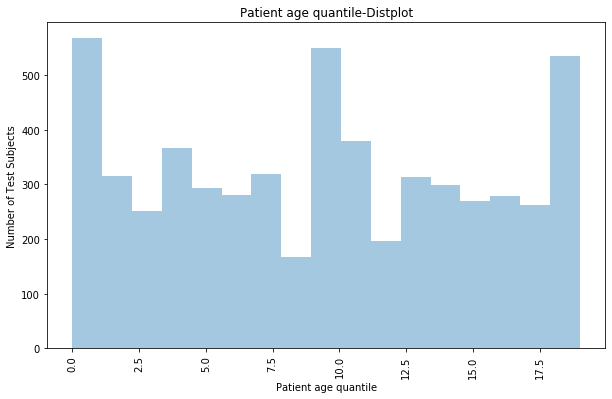

In [138]:
plt.figure(figsize=(10,6))
sns.distplot(df["Patient age quantile"],kde=False)
plt.xticks(rotation = 90)
plt.xlabel('Patient age quantile')
plt.ylabel('Number of Test Subjects')
plt.title('Patient age quantile-Distplot')

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

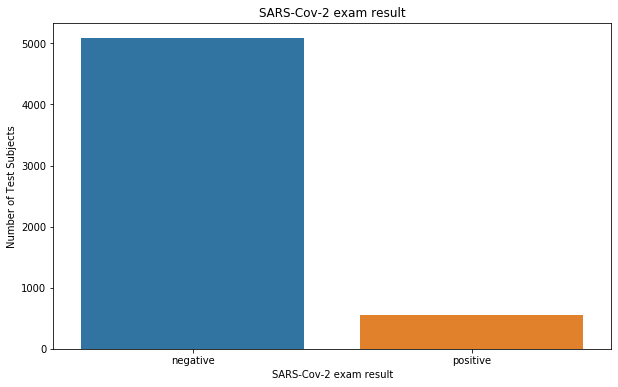

In [139]:
plt.figure(figsize=(10,6))
sns.countplot(df["SARS-Cov-2 exam result"])
plt.ylabel('Number of Test Subjects')
plt.title('SARS-Cov-2 exam result')
df["SARS-Cov-2 exam result"].value_counts()

In [140]:
df["Unit"] = 0

In [141]:
df['Unit'][df["Patient addmited to regular ward (1=yes, 0=no)"] == 1] = 1
df['Unit'][df["Patient addmited to semi-intensive unit (1=yes, 0=no)"] == 1] = 2
df['Unit'][df["Patient addmited to intensive care unit (1=yes, 0=no)"] == 1] = 3

In [142]:
df.shape

(5644, 111)

In [143]:
df.drop(columns=["Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"],axis=1,inplace=True)
df.shape

(5644, 108)

0    5474
1      79
2      50
3      41
Name: Unit, dtype: int64

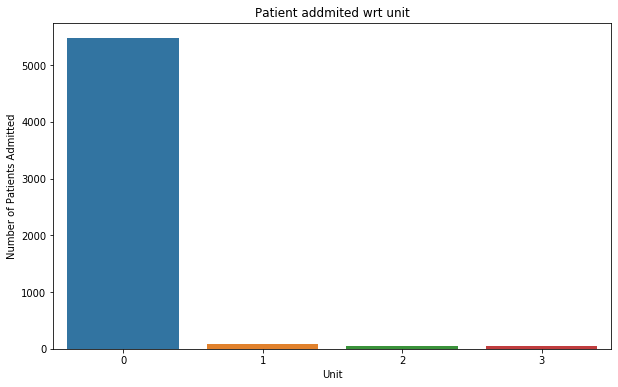

In [144]:
plt.figure(figsize=(10,6))
sns.countplot(df["Unit"])
plt.ylabel('Number of Patients Admitted')
plt.title('Patient addmited wrt unit')
df["Unit"].value_counts()

In [145]:
admitted = df[df["Unit"]!=0]

Text(0.5, 1.0, 'unit wrt SARS-Cov-2 exam result-Barplot')

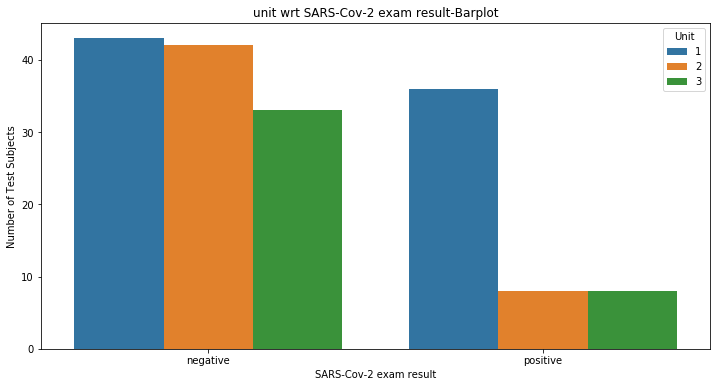

In [146]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Unit", data = admitted)
plt.ylabel('Number of Test Subjects')
plt.title('unit wrt SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hematocrit-Boxplot')

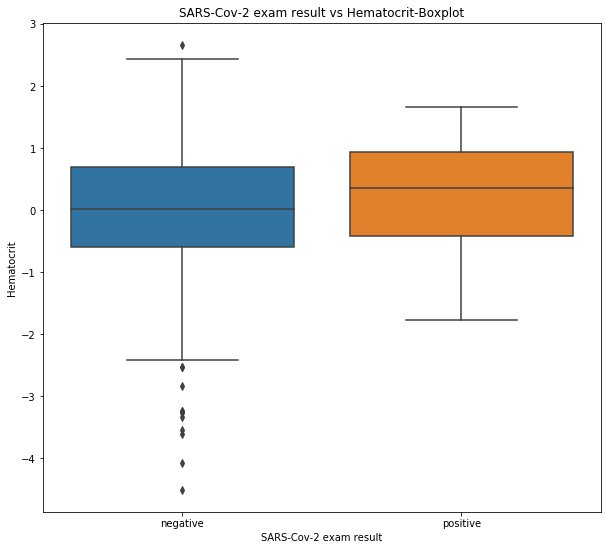

In [147]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hematocrit",data=df)
plt.title('SARS-Cov-2 exam result vs Hematocrit-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hemoglobin-Boxplot')

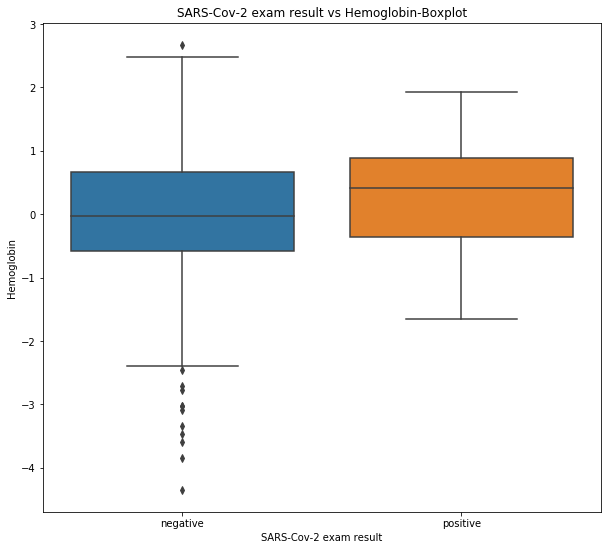

In [148]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hemoglobin",data=df)
plt.title('SARS-Cov-2 exam result vs Hemoglobin-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Platelets-Boxplot')

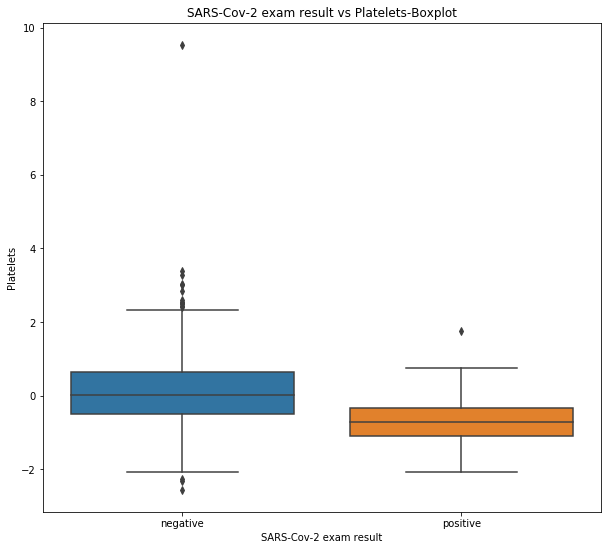

In [149]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="Platelets",data=df)
plt.title('SARS-Cov-2 exam result vs Platelets-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Mean platelet volume-Boxplot')

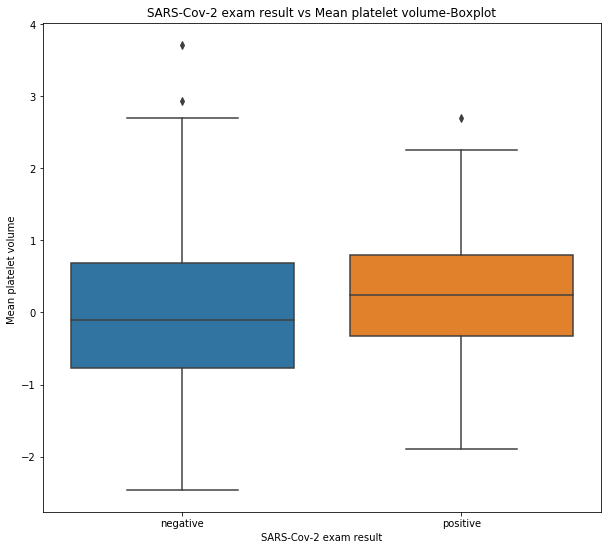

In [150]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="Mean platelet volume ",data=df)
plt.title('SARS-Cov-2 exam result vs Mean platelet volume-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Red blood Cells-Boxplot')

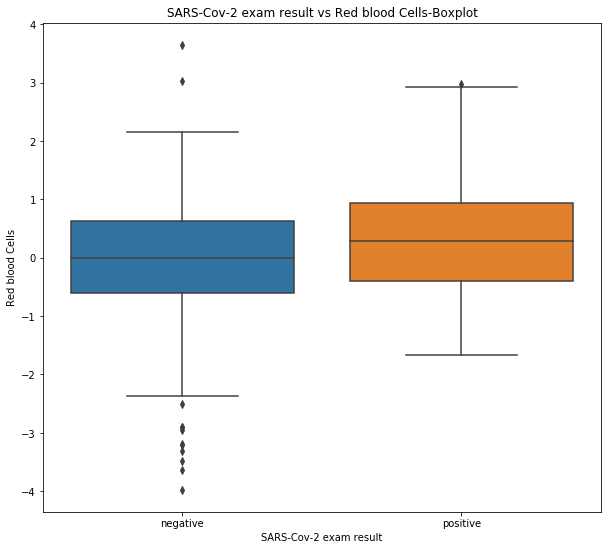

In [151]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="Red blood Cells",data=df)
plt.title('SARS-Cov-2 exam result vs Red blood Cells-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Lymphocytes-Boxplot')

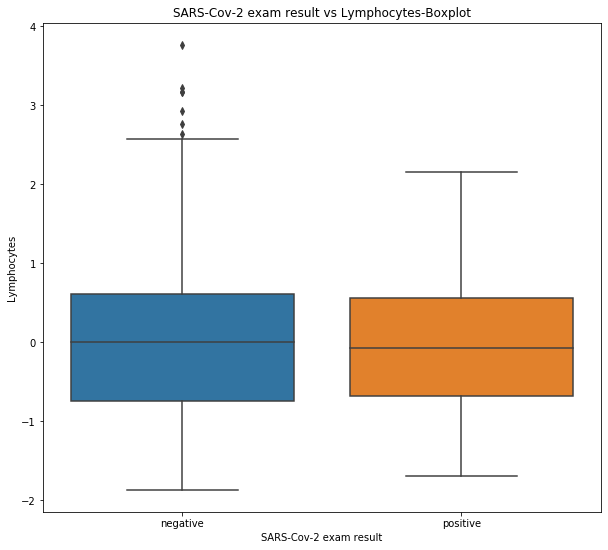

In [152]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="Lymphocytes",data=df)
plt.title('SARS-Cov-2 exam result vs Lymphocytes-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Leukocytes - Boxplot')

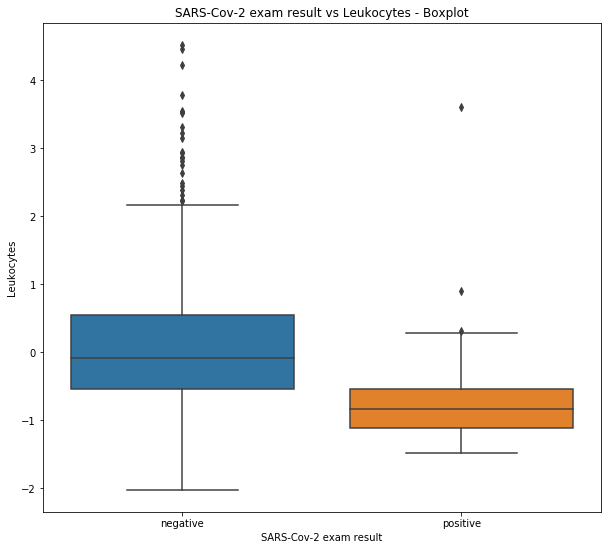

In [153]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Leukocytes",data=df)
plt.title('SARS-Cov-2 exam result vs Leukocytes - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Basophils-Boxplot')

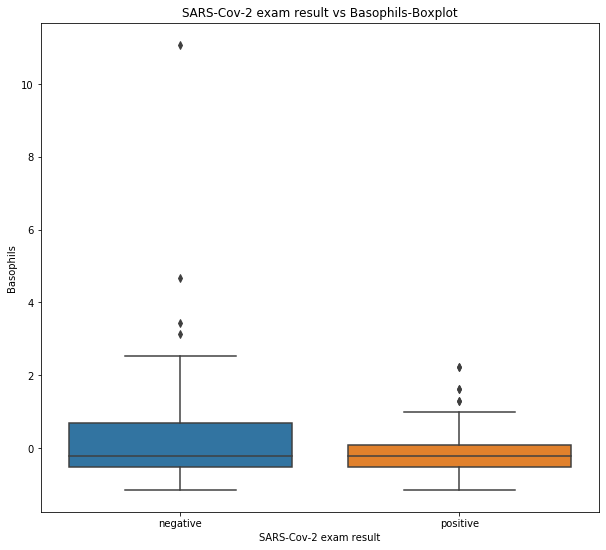

In [154]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Basophils",data=df)
plt.title('SARS-Cov-2 exam result vs Basophils-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Mean corpuscular hemoglobin (MCH) - Boxplot')

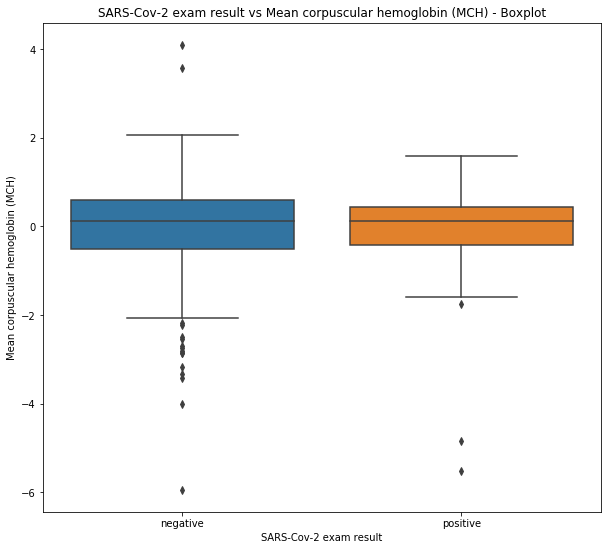

In [155]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Mean corpuscular hemoglobin (MCH)",data=df)
plt.title('SARS-Cov-2 exam result vs Mean corpuscular hemoglobin (MCH) - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Eosinophils - Boxplot')

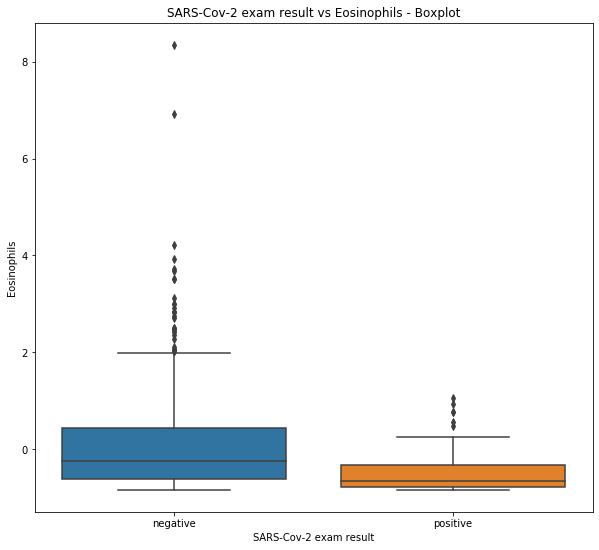

In [156]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Eosinophils",data=df)
plt.title('SARS-Cov-2 exam result vs Eosinophils - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Mean corpuscular volume (MCV)-Boxplot')

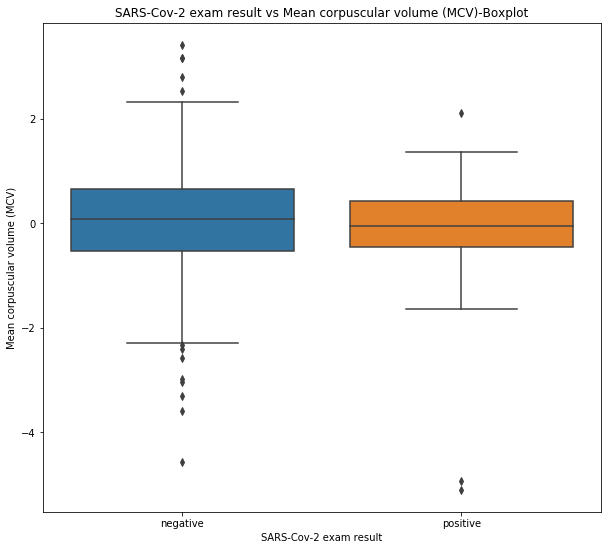

In [157]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Mean corpuscular volume (MCV)",data=df)
plt.title('SARS-Cov-2 exam result vs Mean corpuscular volume (MCV)-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Monocytes-Boxplot')

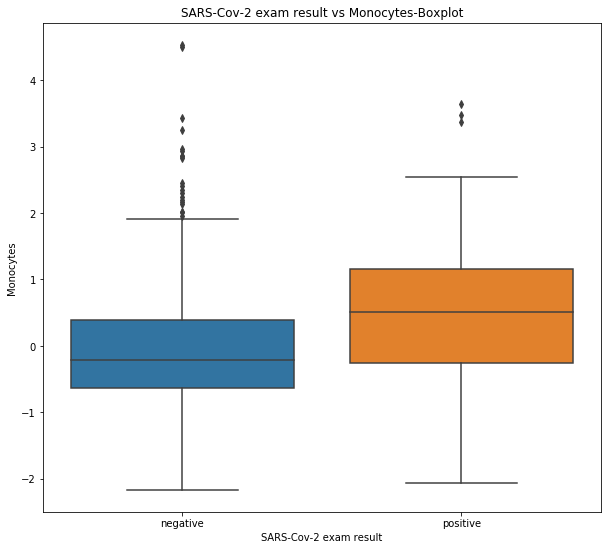

In [158]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="Monocytes",data=df)
plt.title('SARS-Cov-2 exam result vs Monocytes-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Red blood cell distribution width (RDW)-Boxplot')

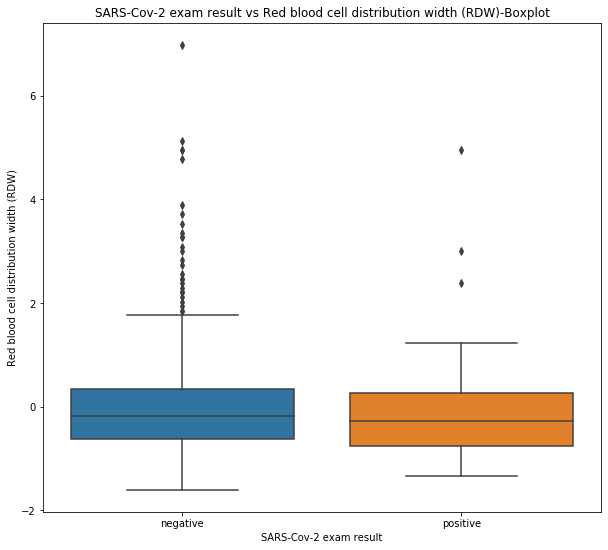

In [159]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="Red blood cell distribution width (RDW)",data=df)
plt.title('SARS-Cov-2 exam result vs Red blood cell distribution width (RDW)-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Serum Glucose-Boxplot')

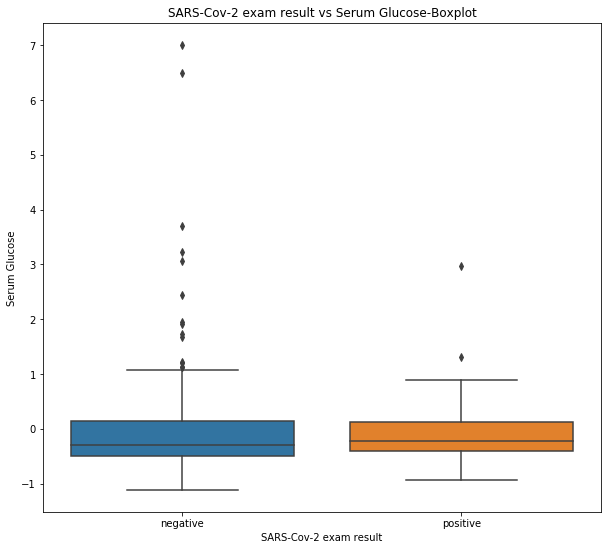

In [160]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Serum Glucose",data=df)
plt.title('SARS-Cov-2 exam result vs Serum Glucose-Boxplot')

Text(0.5, 1.0, 'Respiratory Syncytial Virus as per SARS-Cov-2 exam result-Barplot')

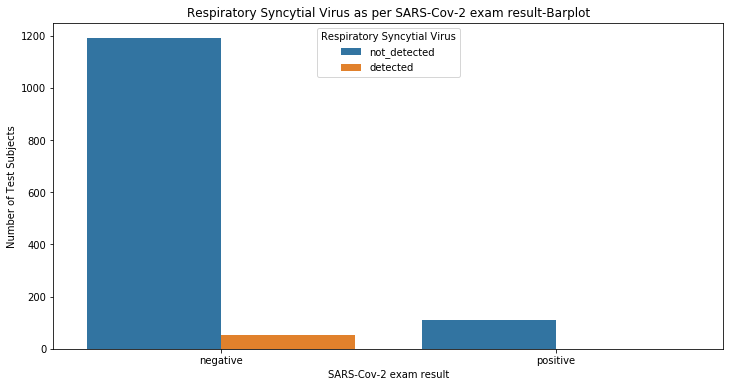

In [161]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Respiratory Syncytial Virus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Respiratory Syncytial Virus as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Influenza A as per SARS-Cov-2 exam result-Barplot')

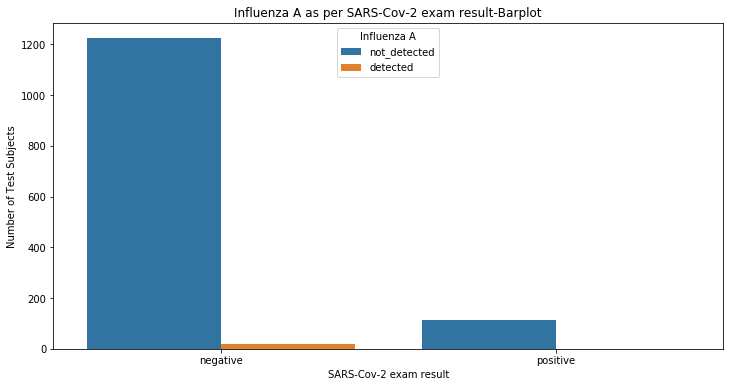

In [162]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza A", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza A as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Influenza B as per SARS-Cov-2 exam result-Barplot')

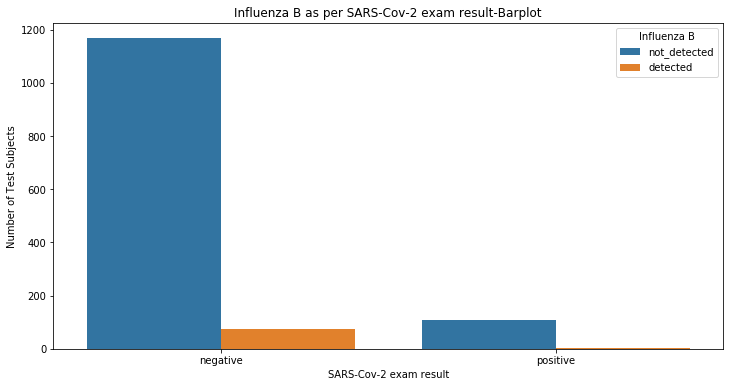

In [163]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza B", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza B as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Parainfluenza 1 as per SARS-Cov-2 exam result-Barplot')

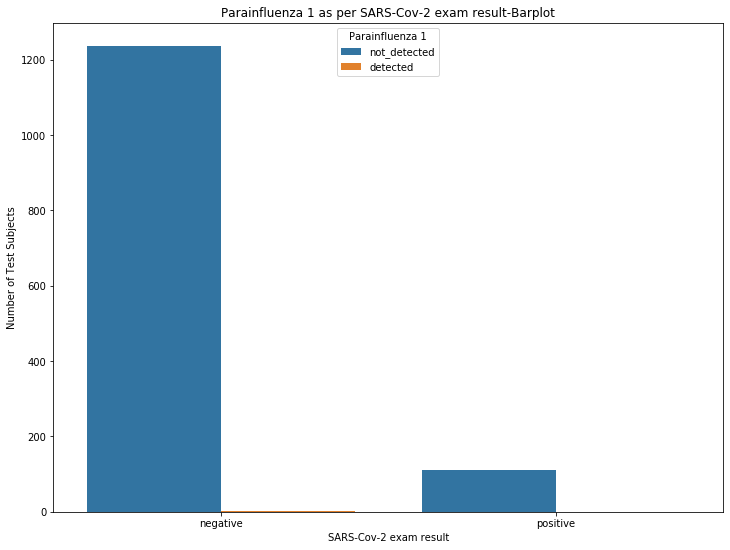

In [164]:
plt.figure(figsize=(12,9))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 1", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 1 as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'CoronavirusNL63 as per SARS-Cov-2 exam result-Barplot')

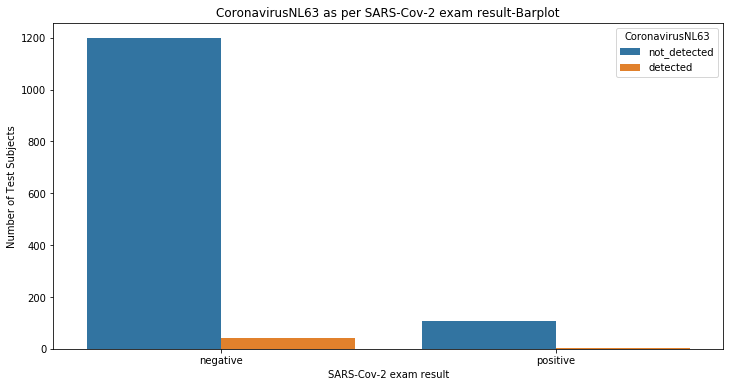

In [165]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="CoronavirusNL63", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('CoronavirusNL63 as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Rhinovirus/Enterovirus as per SARS-Cov-2 exam result-Barplot')

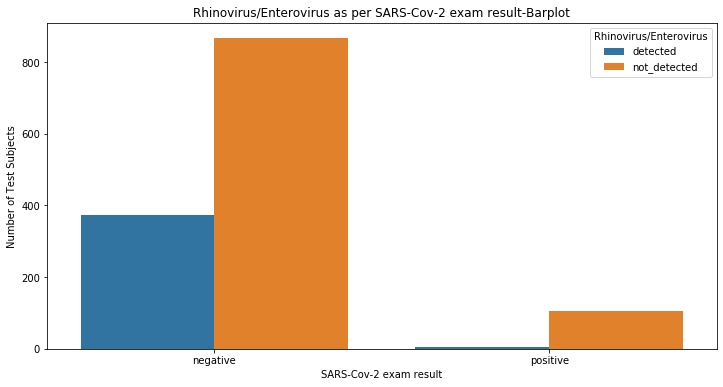

In [166]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Rhinovirus/Enterovirus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Rhinovirus/Enterovirus as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Coronavirus HKU1 as per SARS-Cov-2 exam result -Barplot')

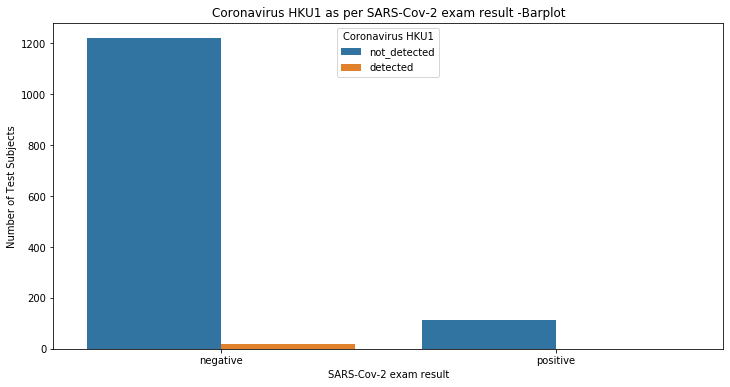

In [167]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Coronavirus HKU1", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Coronavirus HKU1 as per SARS-Cov-2 exam result -Barplot')

Text(0.5, 1.0, 'Parainfluenza 3 as per SARS-Cov-2 exam result- Barplot')

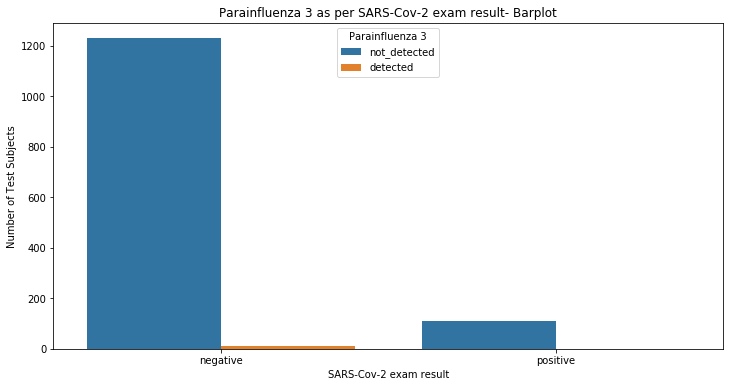

In [168]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 3", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 3 as per SARS-Cov-2 exam result- Barplot')

Text(0.5, 1.0, 'Chlamydophila pneumoniae as per SARS-Cov-2 exam result-Barplot')

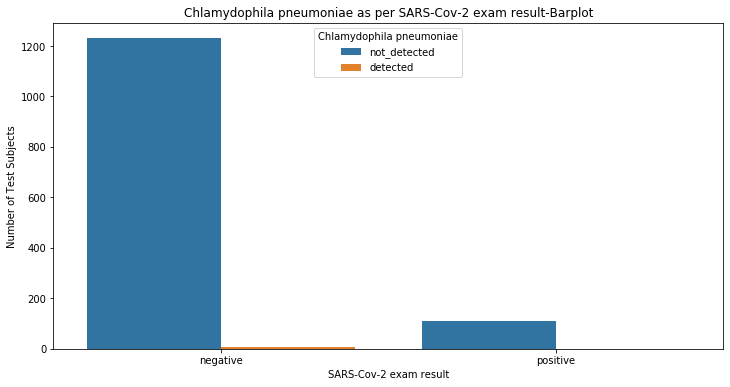

In [169]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Chlamydophila pneumoniae", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Chlamydophila pneumoniae as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Adenovirus as per SARS-Cov-2 exam result - Barplot')

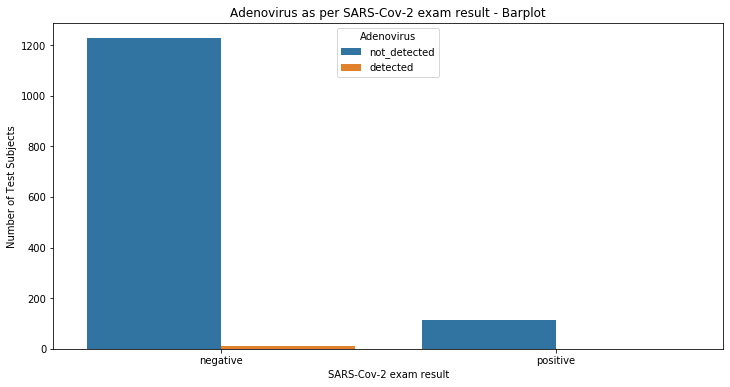

In [170]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Adenovirus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Adenovirus as per SARS-Cov-2 exam result - Barplot')

Text(0.5, 1.0, 'Parainfluenza 4 as per SARS-Cov-2 exam result-Barplot')

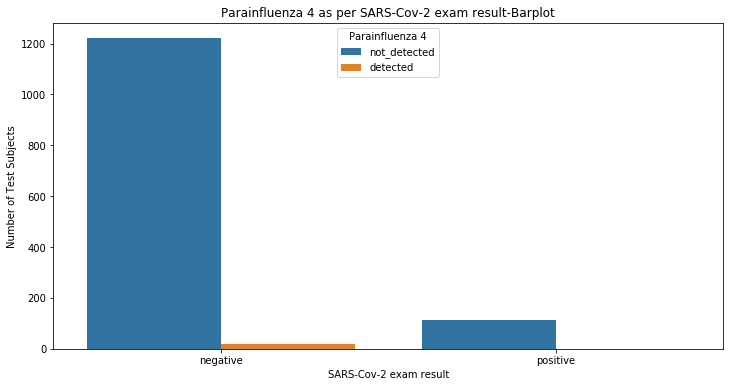

In [171]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 4", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 4 as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Coronavirus229E as per SARS-Cov-2 exam result-Barplot')

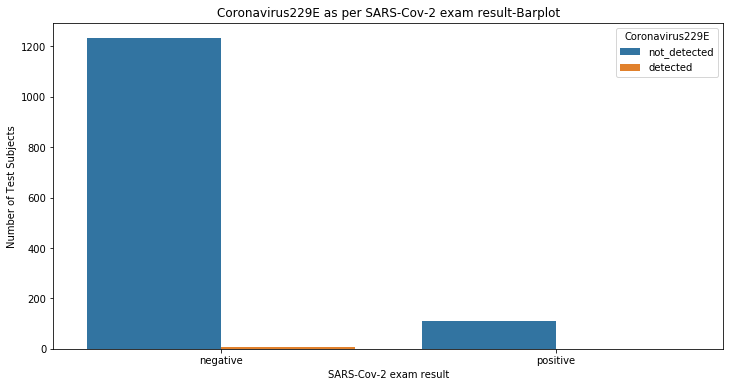

In [172]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Coronavirus229E", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Coronavirus229E as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'CoronavirusOC43 as per SARS-Cov-2 exam result-Barplot')

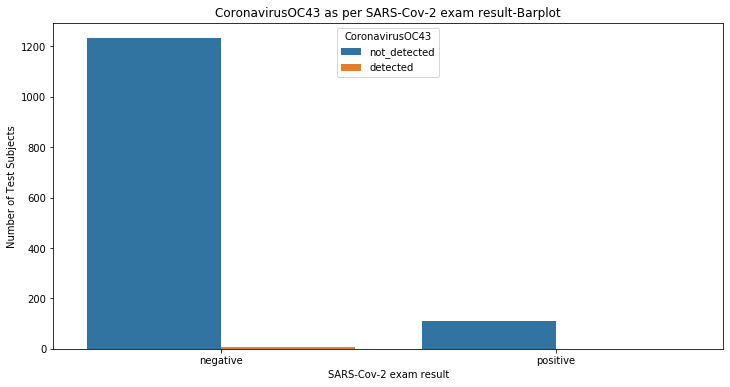

In [173]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="CoronavirusOC43", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('CoronavirusOC43 as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Inf A H1N1 2009 as per SARS-Cov-2 exam result-Barplot')

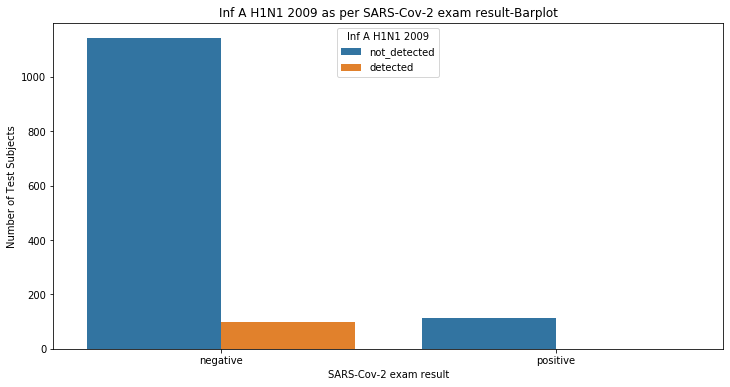

In [174]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Inf A H1N1 2009", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Inf A H1N1 2009 as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Bordetella pertussis as per SARS-Cov-2 exam result-Barplot')

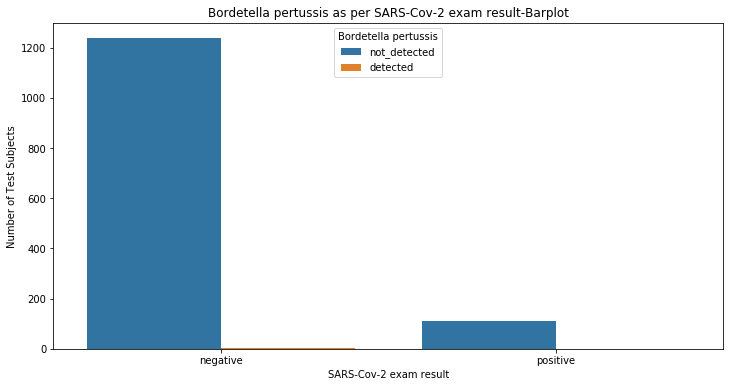

In [175]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Bordetella pertussis", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Bordetella pertussis as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Metapneumovirus as per SARS-Cov-2 exam result-Barplot')

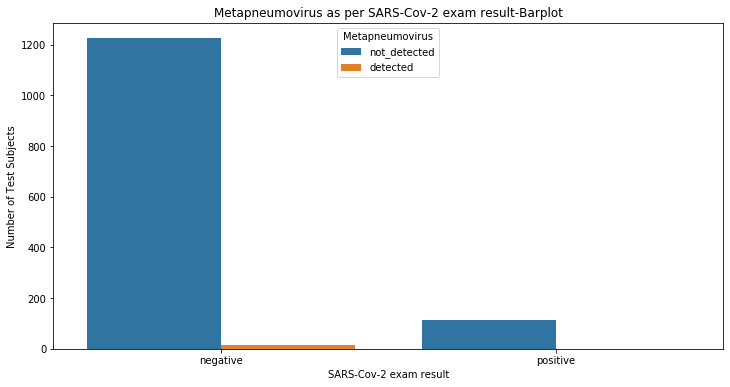

In [176]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Metapneumovirus", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Metapneumovirus as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Parainfluenza 2 as per SARS-Cov-2 exam result-Barplot')

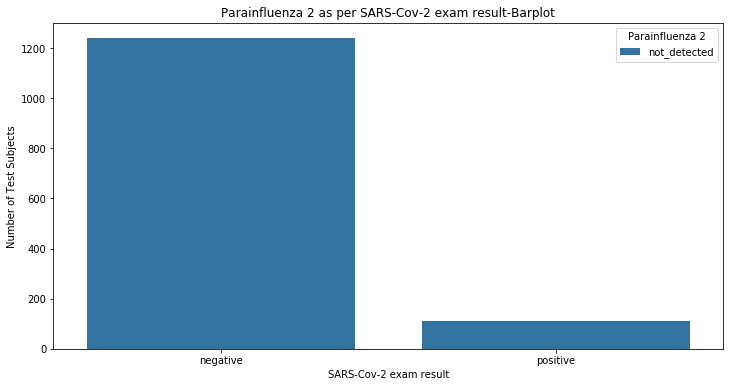

In [177]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Parainfluenza 2", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Parainfluenza 2 as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Neutrophils-Boxplot')

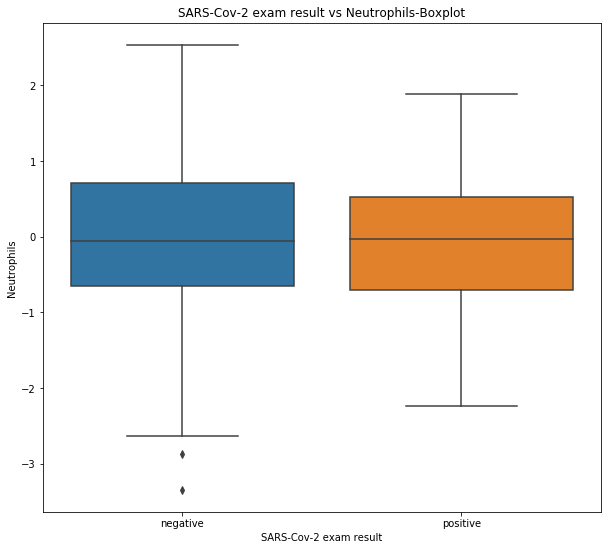

In [178]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Neutrophils",data=df)
plt.title('SARS-Cov-2 exam result vs Neutrophils-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Urea-Boxplot')

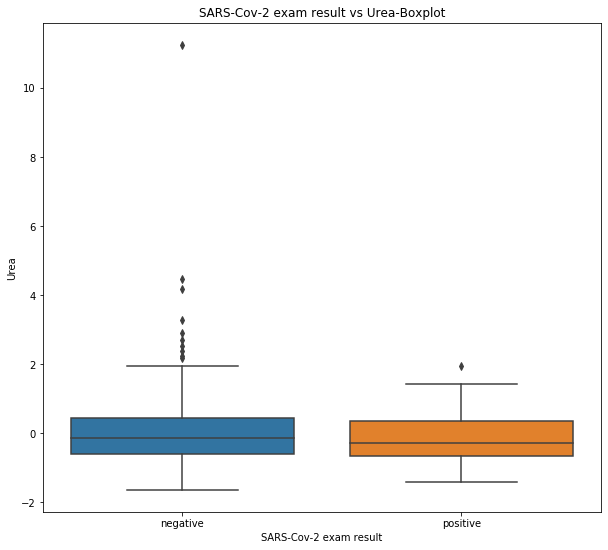

In [179]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Urea",data=df)
plt.title('SARS-Cov-2 exam result vs Urea-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Proteina C reativa mg/dL-Boxplot')

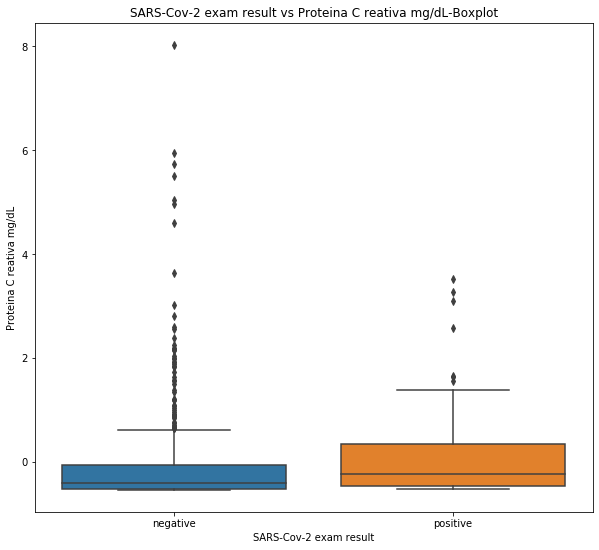

In [180]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Proteina C reativa mg/dL",data=df)
plt.title('SARS-Cov-2 exam result vs Proteina C reativa mg/dL-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Creatinine-Boxplot')

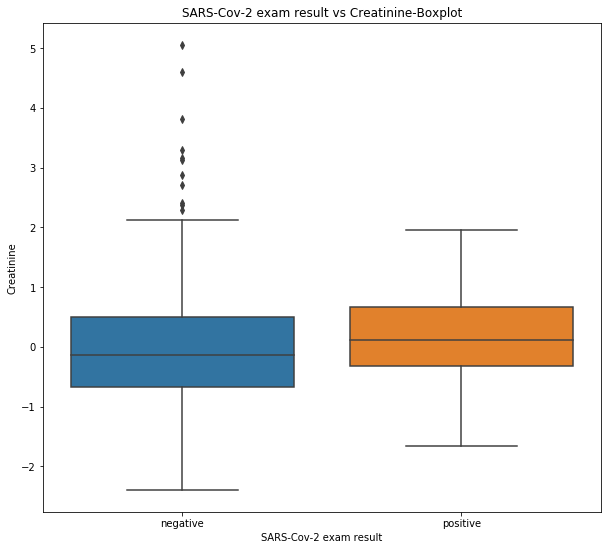

In [181]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Creatinine",data=df)
plt.title('SARS-Cov-2 exam result vs Creatinine-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Potassium-Boxplot')

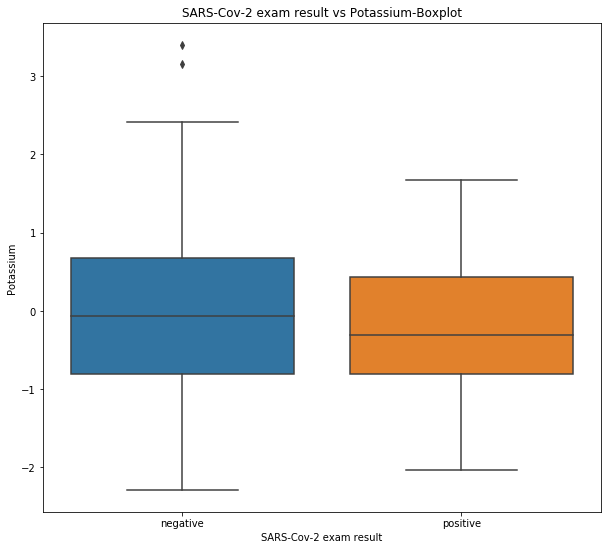

In [182]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Potassium",data=df)
plt.title('SARS-Cov-2 exam result vs Potassium-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Sodium -Boxplot')

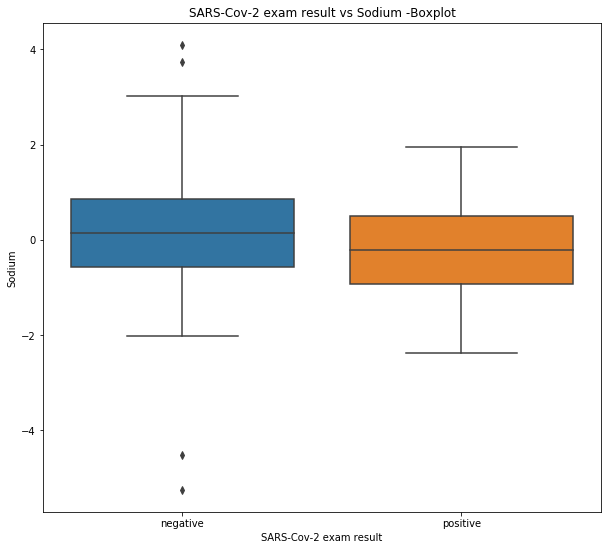

In [183]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Sodium",data=df)
plt.title('SARS-Cov-2 exam result vs Sodium -Boxplot')

Text(0.5, 1.0, 'Influenza B, rapid test as per SARS-Cov-2 exam result -Barplot')

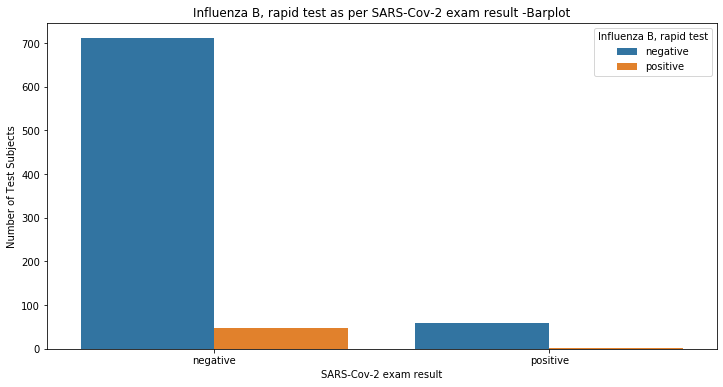

In [184]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza B, rapid test", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza B, rapid test as per SARS-Cov-2 exam result -Barplot')

Text(0.5, 1.0, 'Influenza A, rapid test as per SARS-Cov-2 exam result -Barplot')

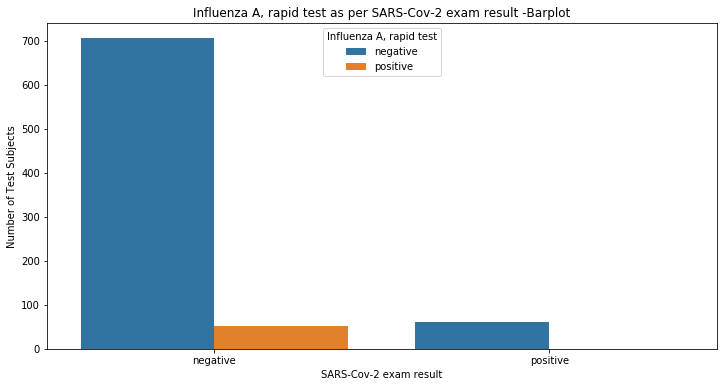

In [185]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Influenza A, rapid test", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Influenza A, rapid test as per SARS-Cov-2 exam result -Barplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Alanine transaminase -Boxplot')

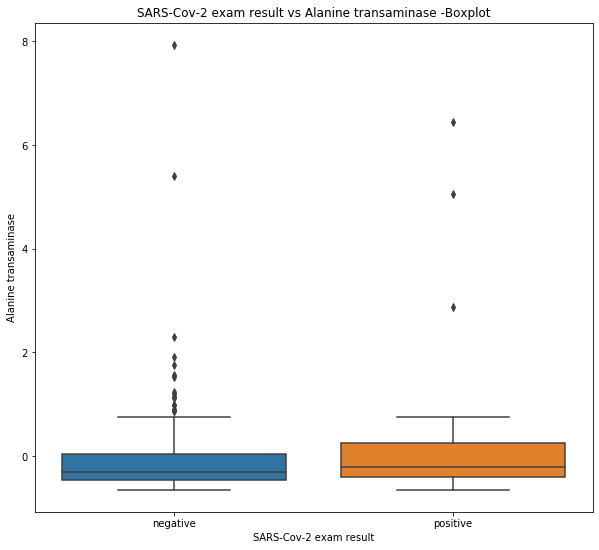

In [186]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Alanine transaminase",data=df)
plt.title('SARS-Cov-2 exam result vs Alanine transaminase -Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Aspartate transaminase-Boxplot')

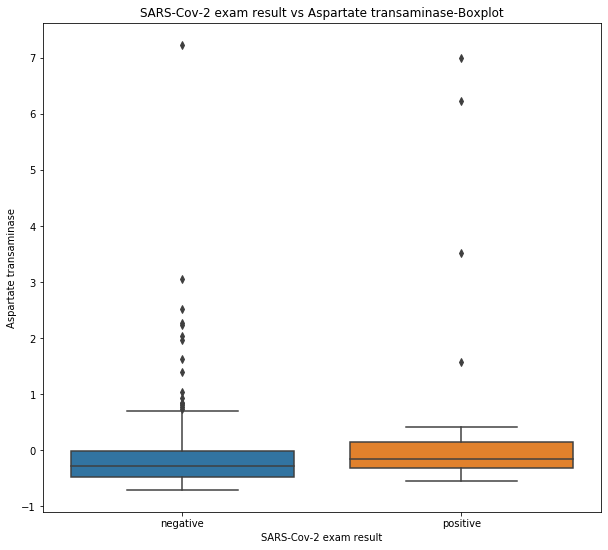

In [187]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Aspartate transaminase",data=df)
plt.title('SARS-Cov-2 exam result vs Aspartate transaminase-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Total Bilirubin - Boxplot')

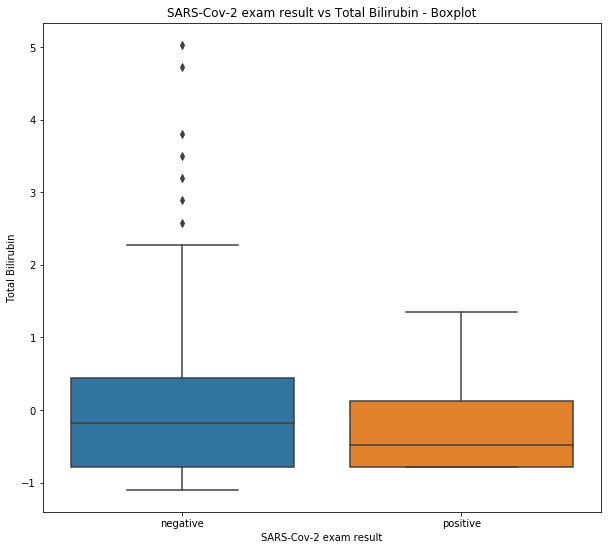

In [188]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Total Bilirubin",data=df)
plt.title('SARS-Cov-2 exam result vs Total Bilirubin - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Direct Bilirubin - Boxplot')

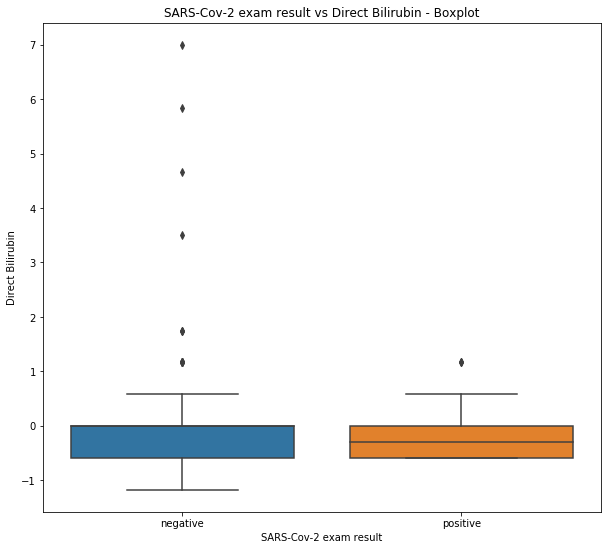

In [189]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Direct Bilirubin",data=df)
plt.title('SARS-Cov-2 exam result vs Direct Bilirubin - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Indirect Bilirubin - Boxplot')

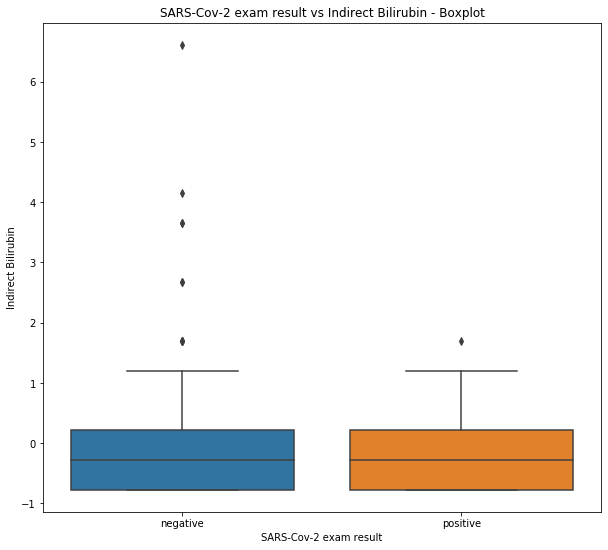

In [190]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Indirect Bilirubin",data=df)
plt.title('SARS-Cov-2 exam result vs Indirect Bilirubin - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Alkaline phosphatase -Boxplot')

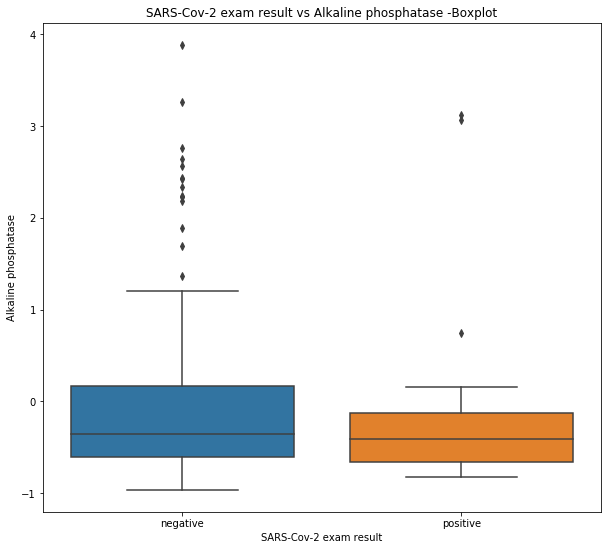

In [191]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Alkaline phosphatase",data=df)
plt.title('SARS-Cov-2 exam result vs Alkaline phosphatase -Boxplot')

Text(0.5, 1.0, 'Strepto A as per SARS-Cov-2 exam result - Barplot')

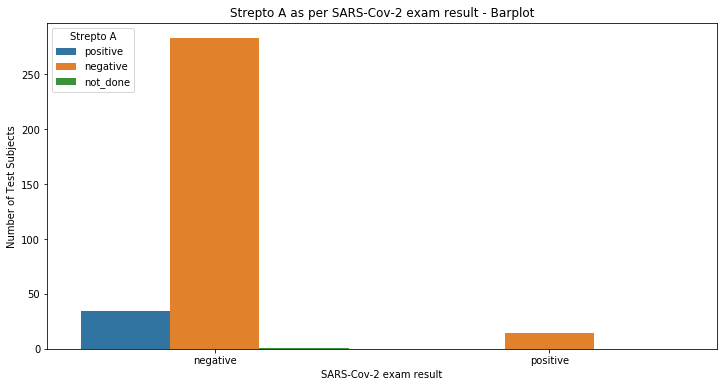

In [192]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Strepto A", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Strepto A as per SARS-Cov-2 exam result - Barplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Magnesium- Boxplot')

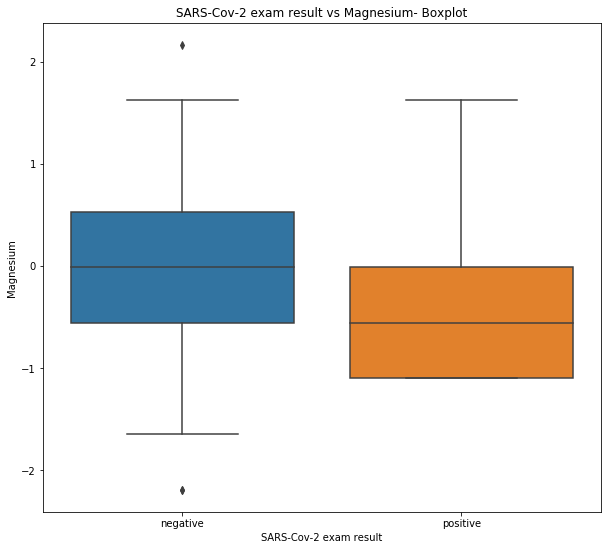

In [193]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Magnesium",data=df)
plt.title('SARS-Cov-2 exam result vs Magnesium- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pCO2 (venous blood gas analysis) -Boxplot')

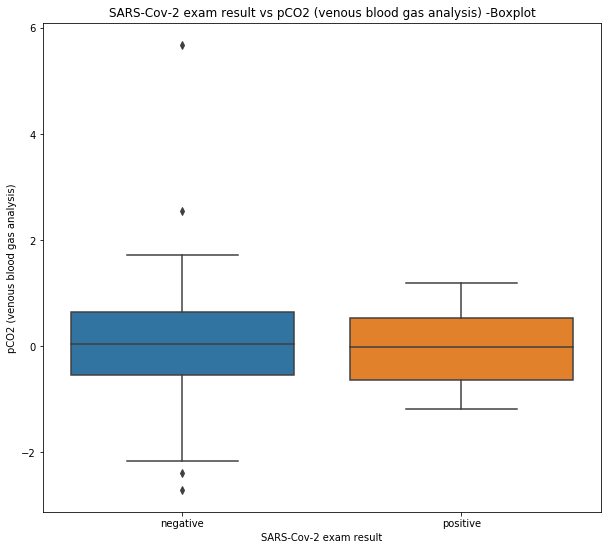

In [194]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pCO2 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pCO2 (venous blood gas analysis) -Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hb saturation (venous blood gas analysis)- Boxplot')

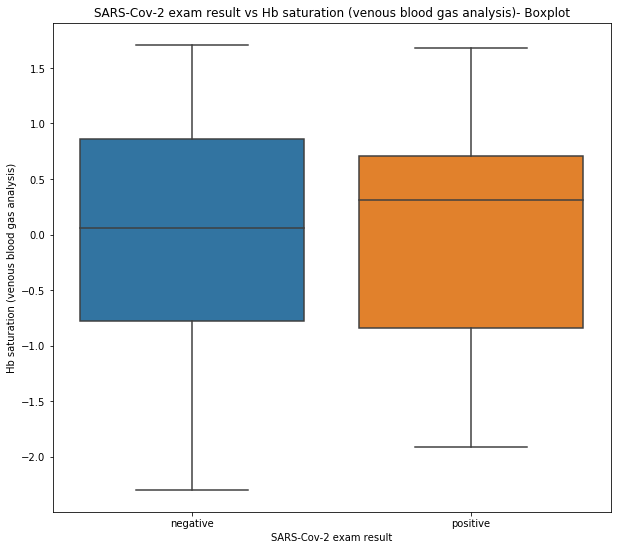

In [195]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hb saturation (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Hb saturation (venous blood gas analysis)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Base excess (venous blood gas analysis)- Boxplot')

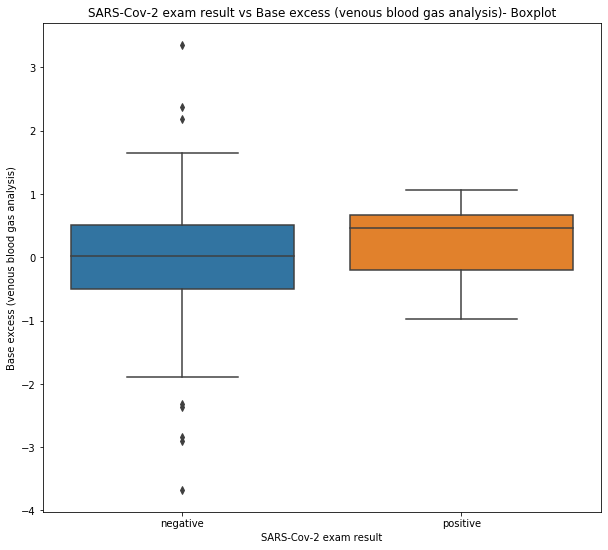

In [196]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Base excess (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Base excess (venous blood gas analysis)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pO2 (venous blood gas analysis)- Boxplot')

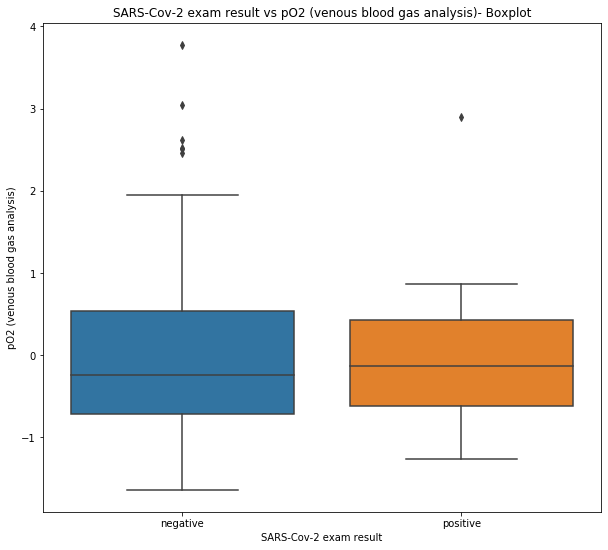

In [197]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pO2 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pO2 (venous blood gas analysis)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Total CO2 (venous blood gas analysis)-Boxplot')

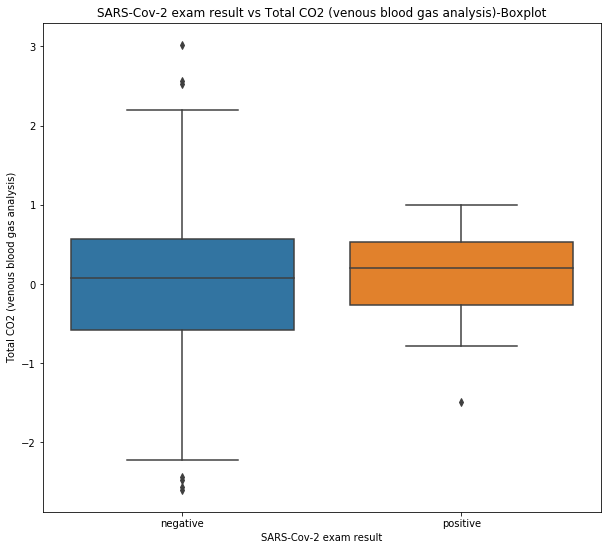

In [198]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Total CO2 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Total CO2 (venous blood gas analysis)-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pH (venous blood gas analysis)-Boxplot')

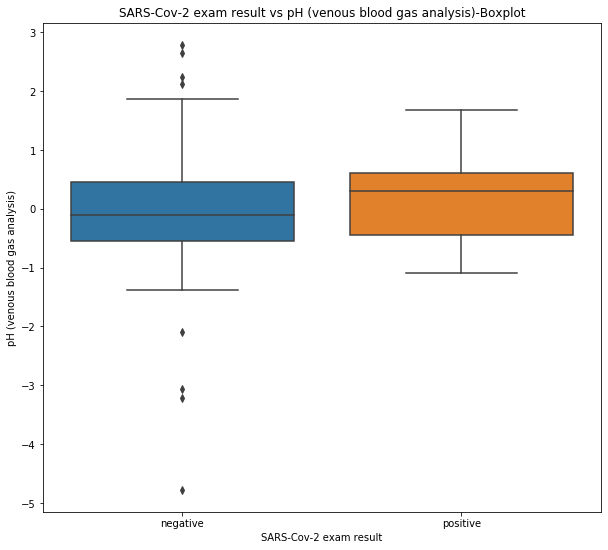

In [199]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pH (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pH (venous blood gas analysis)-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs HCO3 (venous blood gas analysis)-Boxplot')

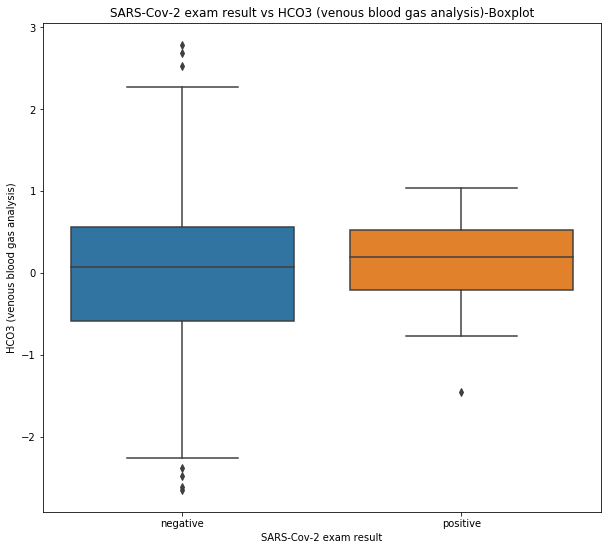

In [200]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="HCO3 (venous blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs HCO3 (venous blood gas analysis)-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Rods - Boxplot')

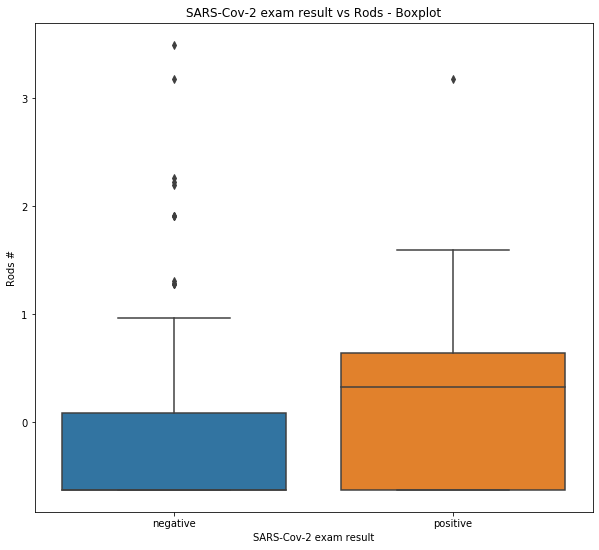

In [201]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Rods #",data=df)
plt.title('SARS-Cov-2 exam result vs Rods - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Segmented-Boxplot')

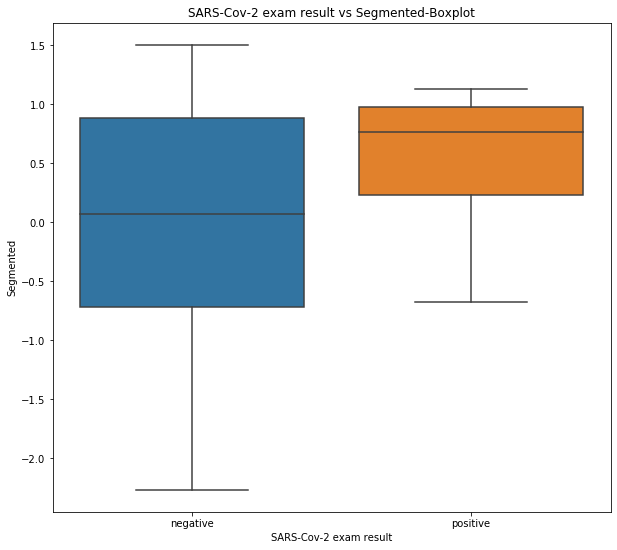

In [202]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Segmented",data=df)
plt.title('SARS-Cov-2 exam result vs Segmented-Boxplot')

Text(0.5, 1.0, 'Promyelocytes level as per SARS-Cov-2 exam result-Barplot')

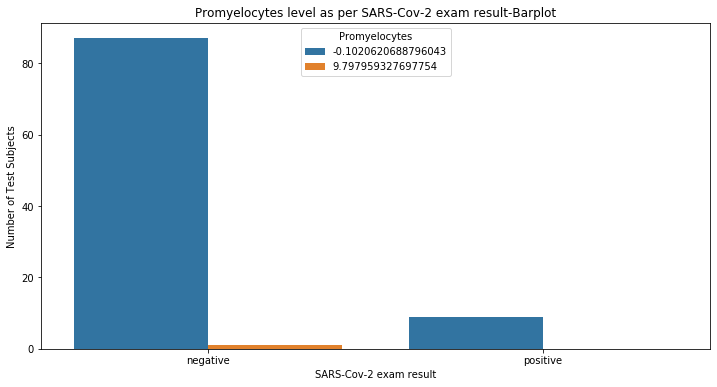

In [203]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Promyelocytes", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Promyelocytes level as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Metamyelocytes level as per SARS-Cov-2 exam result-Barplot')

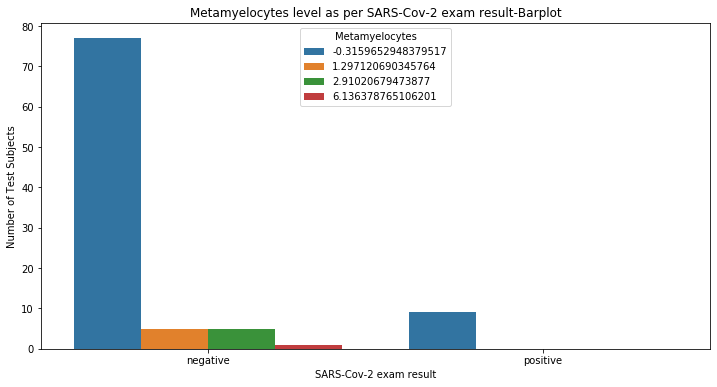

In [204]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Metamyelocytes", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Metamyelocytes level as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Myelocytes level as per SARS-Cov-2 exam result- Barplot')

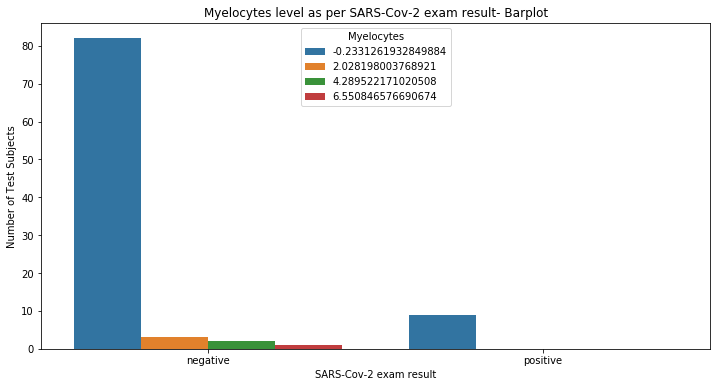

In [205]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Myelocytes", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Myelocytes level as per SARS-Cov-2 exam result- Barplot')

Text(0.5, 1.0, 'Urine - Esterase as per SARS-Cov-2 exam result-Barplot')

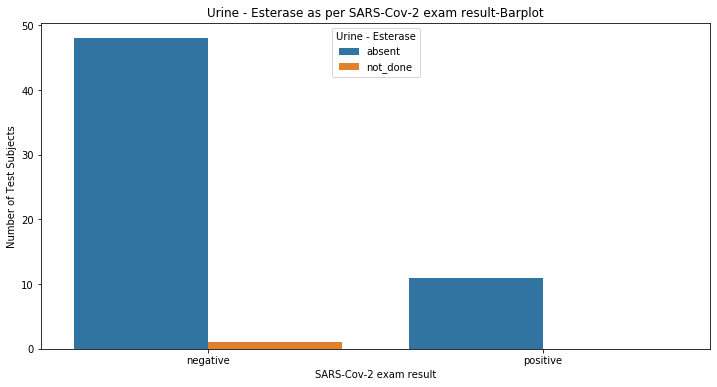

In [206]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Esterase", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Esterase as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Urine - Aspect as per SARS-Cov-2 exam result- Barplot')

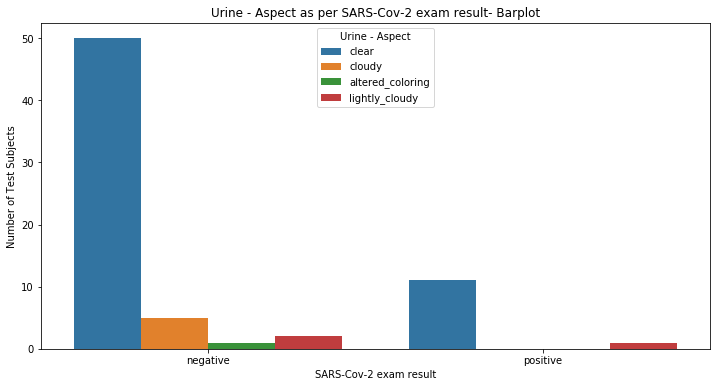

In [207]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Aspect", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Aspect as per SARS-Cov-2 exam result- Barplot')

In [208]:
df["Urine - pH"].value_counts()

5.0              14
7.0               8
5                 8
6.0               7
6                 6
6.5               5
6.5               5
7                 4
5                 3
7.5               3
5.5               2
5.5               2
8.0               1
6                 1
Não Realizado     1
Name: Urine - pH, dtype: int64

In [209]:
df["Urine - pH"].replace('Não Realizado', np.NaN,inplace=True)

Text(0.5, 1.0, 'Urine - pH as per SARS-Cov-2 exam result - Barplot')

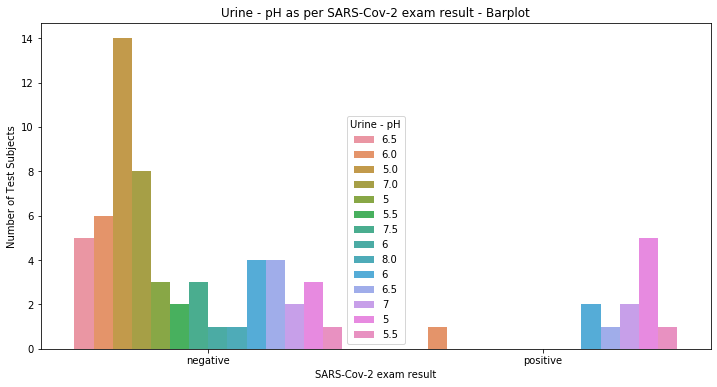

In [210]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - pH", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - pH as per SARS-Cov-2 exam result - Barplot')

Text(0.5, 1.0, 'Urine - Hemoglobin as per SARS-Cov-2 exam result- Barplot')

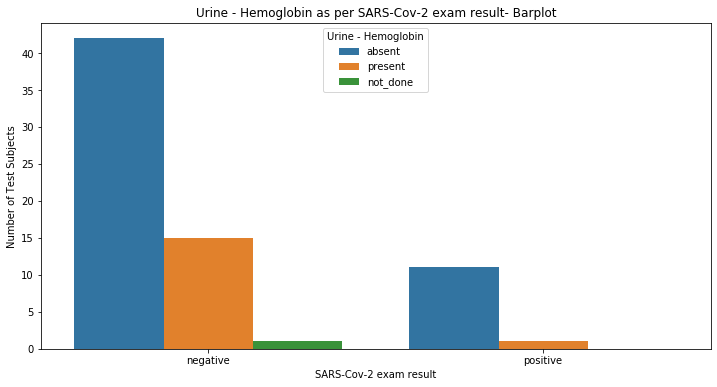

In [211]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Hemoglobin", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Hemoglobin as per SARS-Cov-2 exam result- Barplot')

Text(0.5, 1.0, 'Urine - Bile pigments as per SARS-Cov-2 exam result-Barplot')

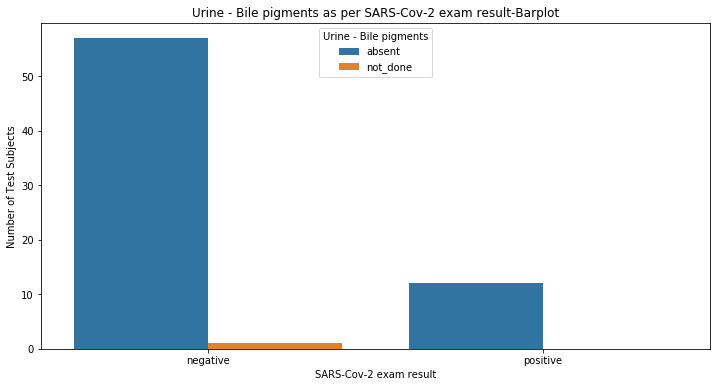

In [212]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Bile pigments", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Bile pigments as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Urine - Ketone Bodies as per SARS-Cov-2 exam result- Barplot')

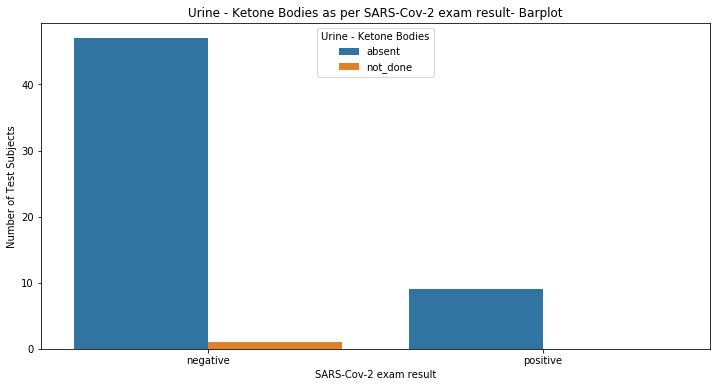

In [213]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Ketone Bodies", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Ketone Bodies as per SARS-Cov-2 exam result- Barplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Urine - Density- Boxplot')

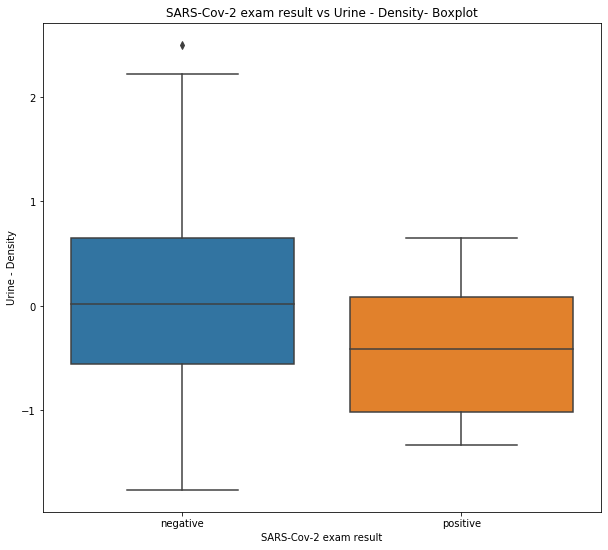

In [214]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Urine - Density",data=df)
plt.title('SARS-Cov-2 exam result vs Urine - Density- Boxplot')

Text(0.5, 1.0, 'Urine - Urobilinogen as per SARS-Cov-2 exam result- Barplot')

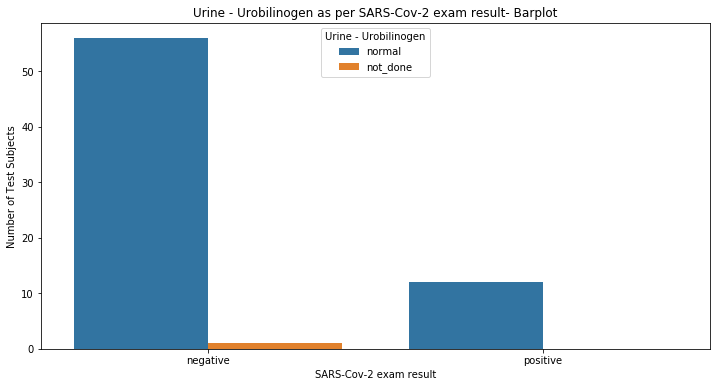

In [215]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Urobilinogen", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Urobilinogen as per SARS-Cov-2 exam result- Barplot')

Text(0.5, 1.0, 'Urine - Protein as per SARS-Cov-2 exam result- Barplot')

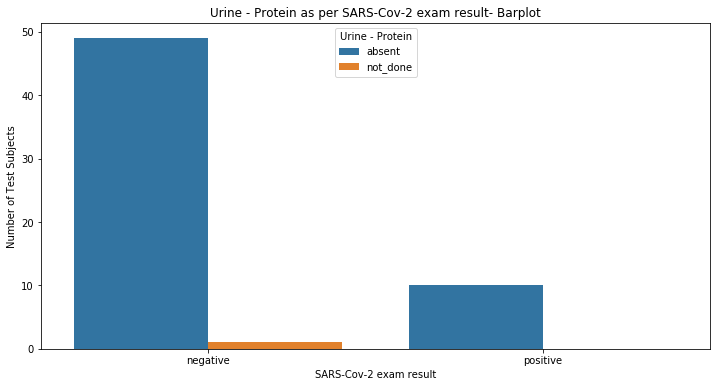

In [216]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Protein", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Protein as per SARS-Cov-2 exam result- Barplot')

In [217]:
df["Urine - Leukocytes"].nunique()

31

In [218]:
df["Urine - Leukocytes"].value_counts()

<1000      9
3000       9
4000       7
2000       7
1000       4
8000       3
29000      2
38000      2
7000       2
22000      2
5000       2
10000      2
624000     1
23000      1
77000      1
16000      1
19000      1
43000      1
2600       1
5942000    1
28000      1
4600       1
2500       1
124000     1
5300       1
40000      1
3310000    1
229000     1
6000       1
10600      1
32000      1
Name: Urine - Leukocytes, dtype: int64

In [219]:
df["Urine - Leukocytes"].replace('<1000', 700,inplace=True) 

In [220]:
df["Urine - Leukocytes"].astype(float)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
5639        NaN
5640        NaN
5641        NaN
5642    29000.0
5643        NaN
Name: Urine - Leukocytes, Length: 5644, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

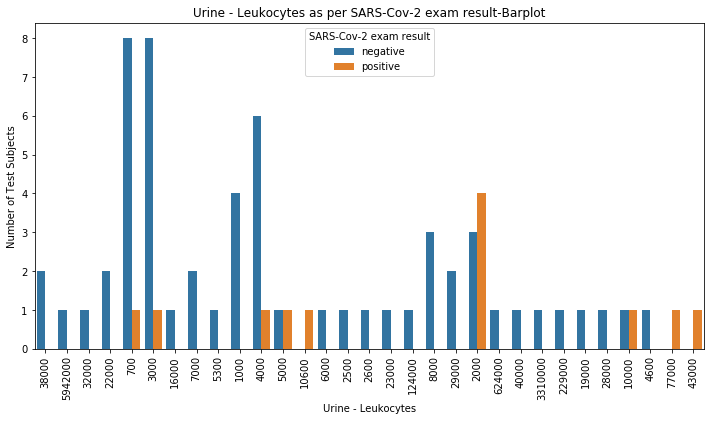

In [221]:
plt.figure(figsize=(12,6))
sns.countplot(x="Urine - Leukocytes",hue="SARS-Cov-2 exam result", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Leukocytes as per SARS-Cov-2 exam result-Barplot')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Urine - Crystals as per SARS-Cov-2 exam result-Barplot')

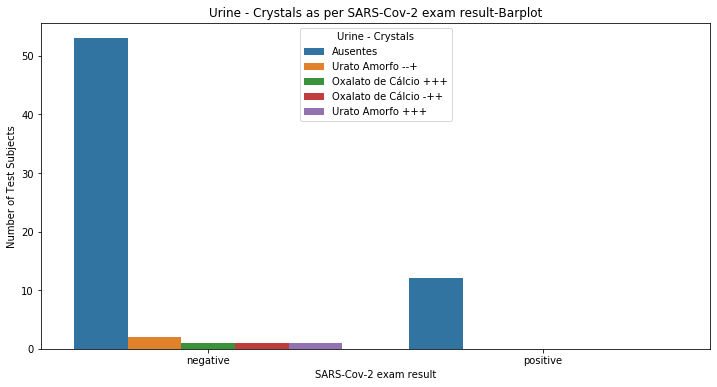

In [222]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Crystals", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Crystals as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Urine - Red blood cells-Boxplot')

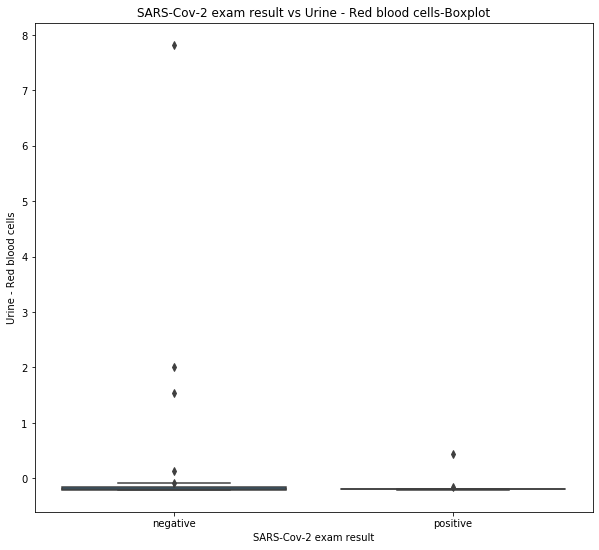

In [223]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Urine - Red blood cells",data=df)
plt.title('SARS-Cov-2 exam result vs Urine - Red blood cells-Boxplot')

Text(0.5, 1.0, 'Urine - Hyaline cylinders as per SARS-Cov-2 exam result-Barplot')

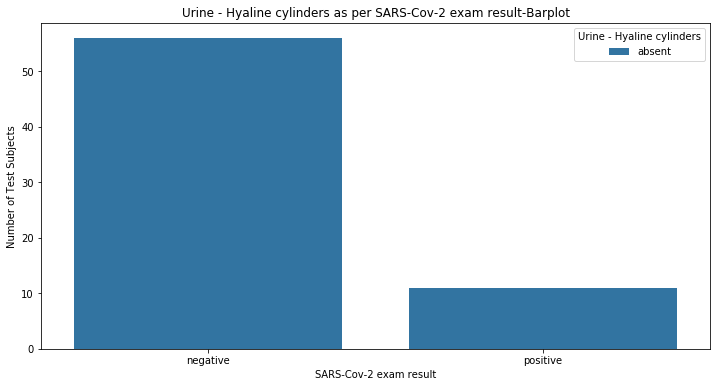

In [224]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Hyaline cylinders", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Hyaline cylinders as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Urine - Granular cylinders as per SARS-Cov-2 exam result-Barplot')

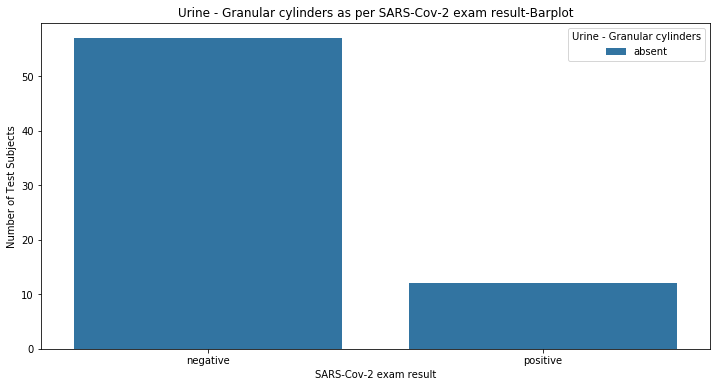

In [225]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Granular cylinders", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Granular cylinders as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Urine - Yeasts as per SARS-Cov-2 exam result-Barplot')

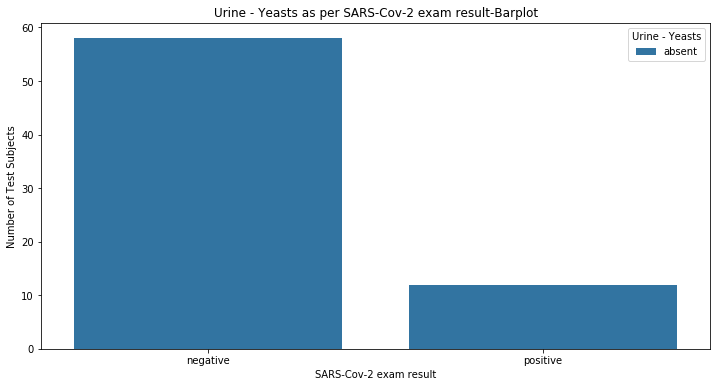

In [226]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Yeasts", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Yeasts as per SARS-Cov-2 exam result-Barplot')

Text(0.5, 1.0, 'Urine - Color as per SARS-Cov-2 exam result -Barplot')

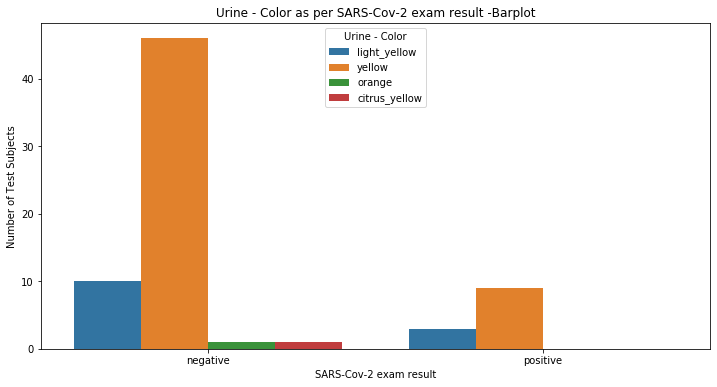

In [227]:
plt.figure(figsize=(12,6))
sns.countplot(x="SARS-Cov-2 exam result",hue="Urine - Color", data = df)
plt.ylabel('Number of Test Subjects')
plt.title('Urine - Color as per SARS-Cov-2 exam result -Barplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Relationship (Patient/Normal)- Boxplot')

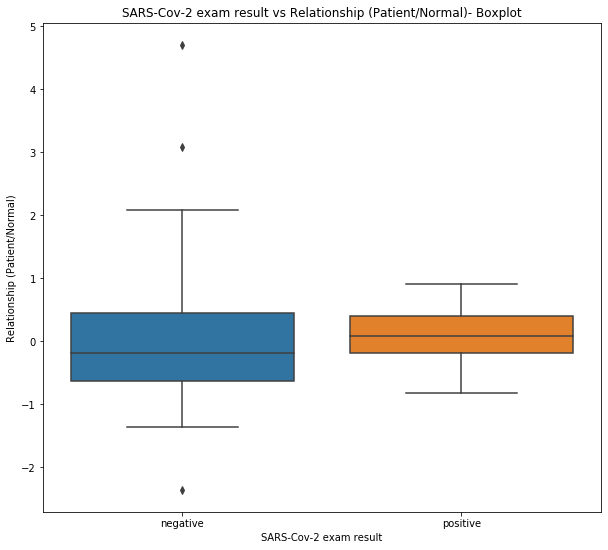

In [228]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Relationship (Patient/Normal)",data=df)
plt.title('SARS-Cov-2 exam result vs Relationship (Patient/Normal)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs International normalized ratio (INR) -Boxplot')

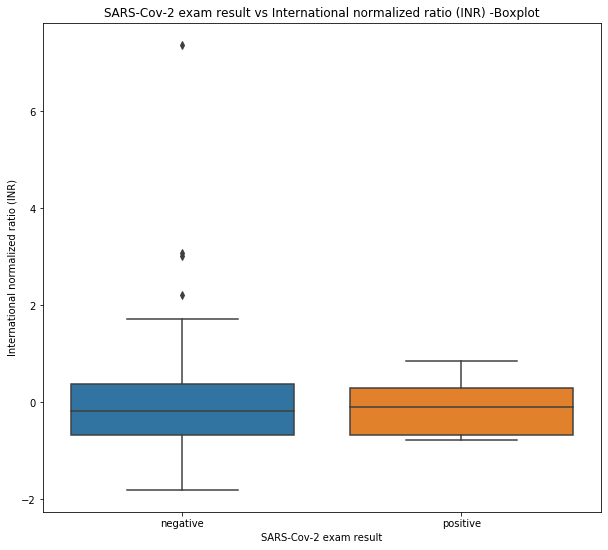

In [229]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="International normalized ratio (INR)",data=df)
plt.title('SARS-Cov-2 exam result vs International normalized ratio (INR) -Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Lactic Dehydrogenase- Boxplot')

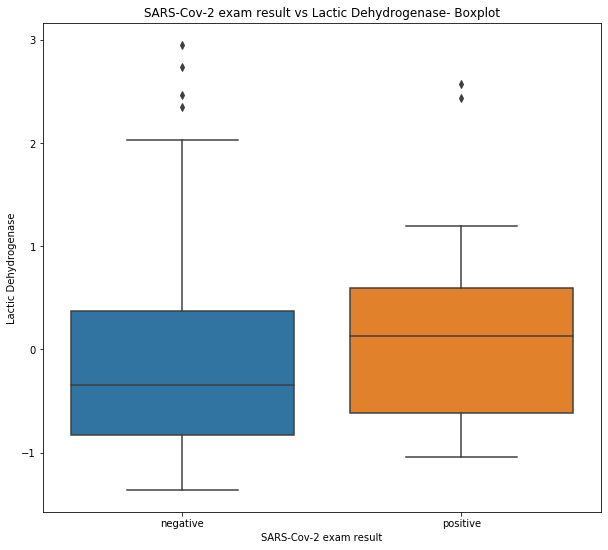

In [230]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Lactic Dehydrogenase",data=df)
plt.title('SARS-Cov-2 exam result vs Lactic Dehydrogenase- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Ferritin - Boxplot')

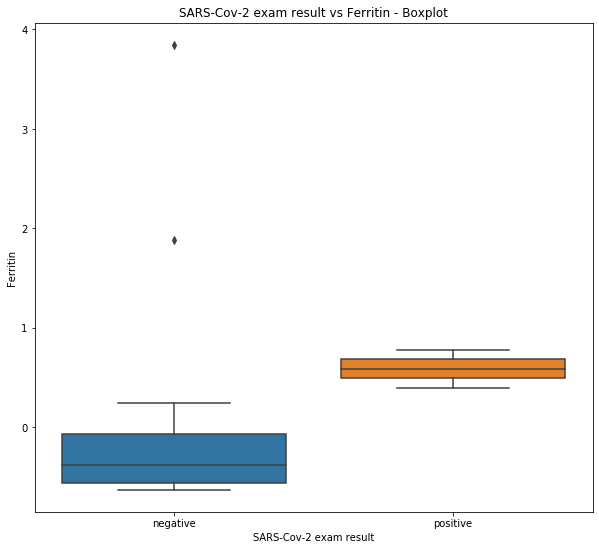

In [231]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Ferritin",data=df)
plt.title('SARS-Cov-2 exam result vs Ferritin - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Arterial Lactic Acid- Boxplot')

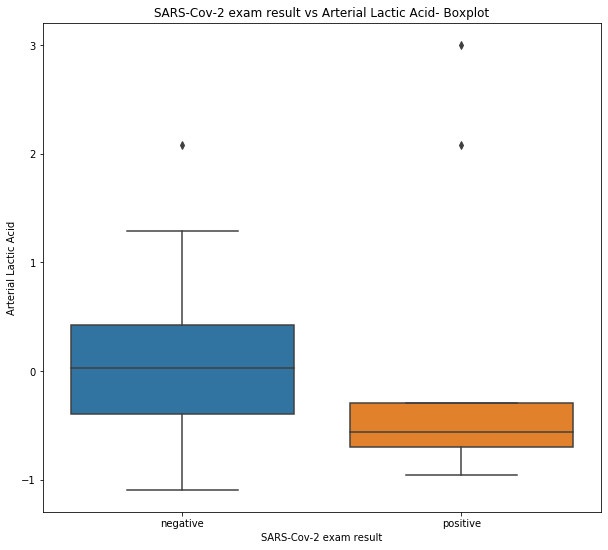

In [232]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Arterial Lactic Acid",data=df)
plt.title('SARS-Cov-2 exam result vs Arterial Lactic Acid- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Lipase dosage -Boxplot')

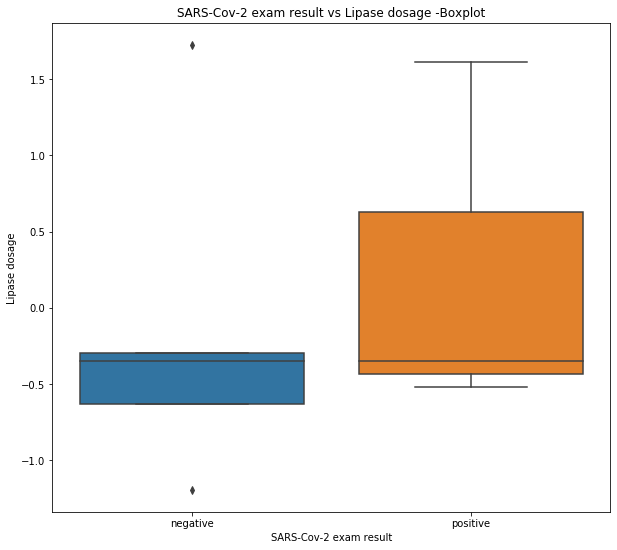

In [233]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Lipase dosage",data=df)
plt.title('SARS-Cov-2 exam result vs Lipase dosage -Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Hb saturation (arterial blood gases)- Boxplot')

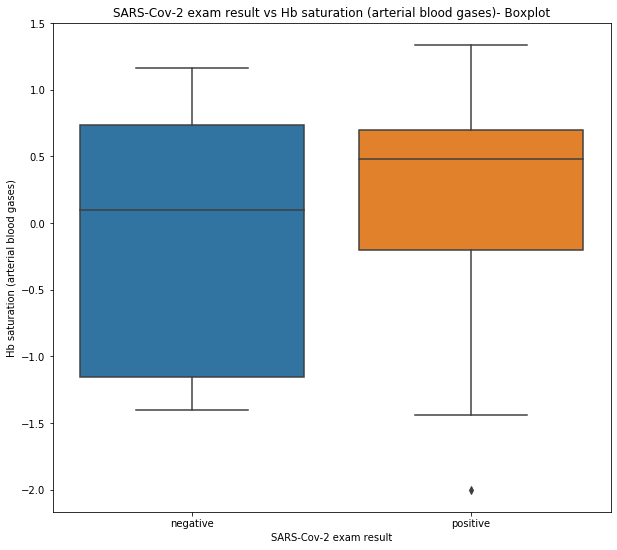

In [234]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Hb saturation (arterial blood gases)",data=df)
plt.title('SARS-Cov-2 exam result vs Hb saturation (arterial blood gases)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pCO2 (arterial blood gas analysis)- Boxplot')

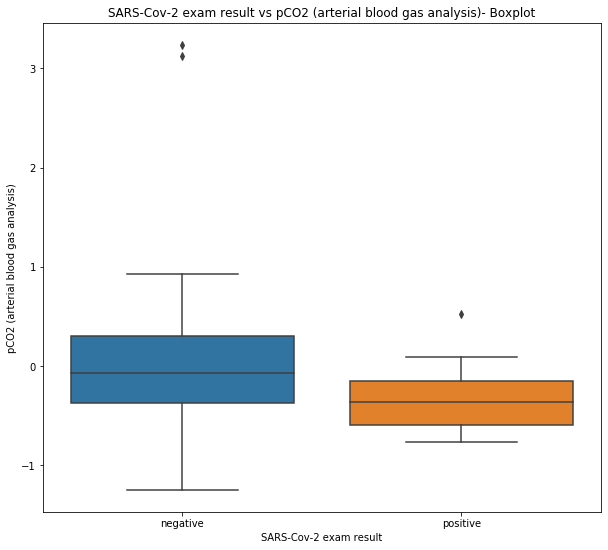

In [235]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pCO2 (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pCO2 (arterial blood gas analysis)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Base excess (arterial blood gas analysis)- Boxplot')

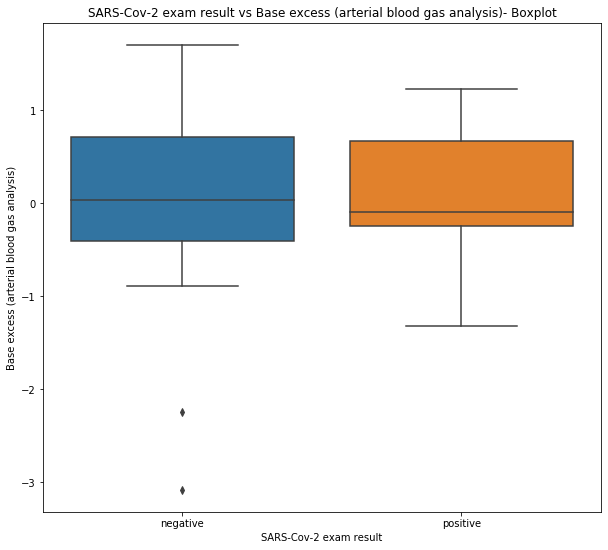

In [236]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Base excess (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Base excess (arterial blood gas analysis)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pH (arterial blood gas analysis)- Boxplot')

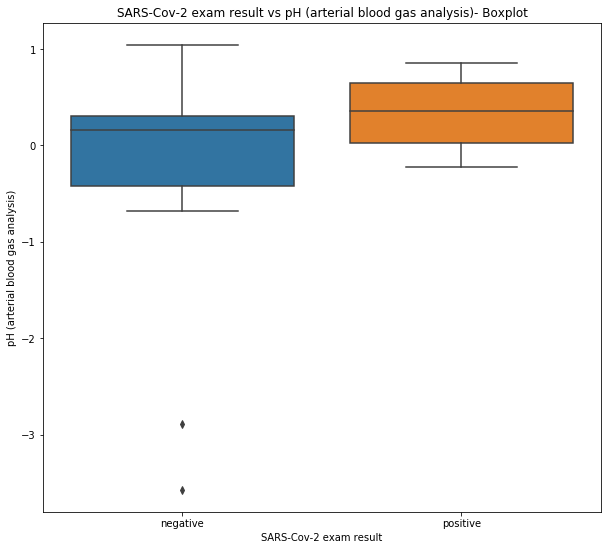

In [237]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pH (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pH (arterial blood gas analysis)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Total CO2 (arterial blood gas analysis)-Boxplot')

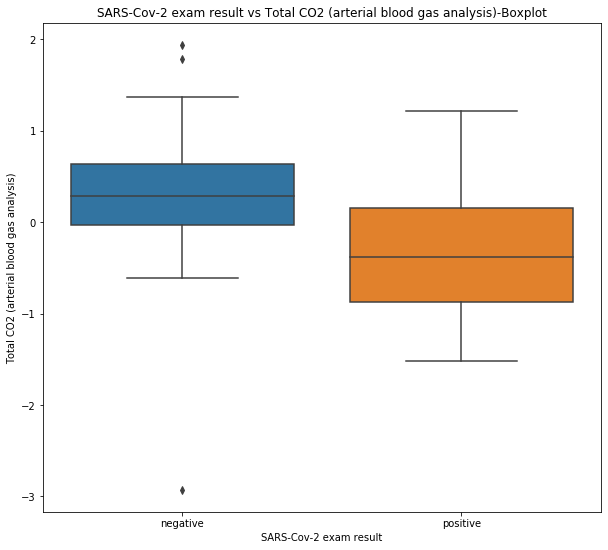

In [238]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Total CO2 (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs Total CO2 (arterial blood gas analysis)-Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs HCO3 (arterial blood gas analysis) - Boxplot')

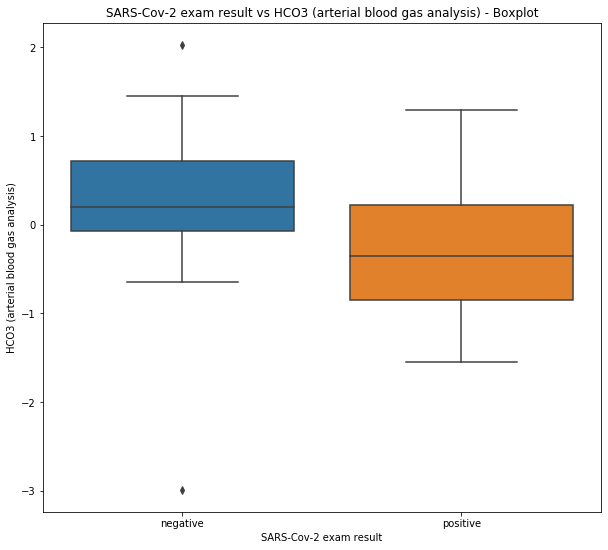

In [239]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result",y="HCO3 (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs HCO3 (arterial blood gas analysis) - Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs pO2 (arterial blood gas analysis)- Boxplot')

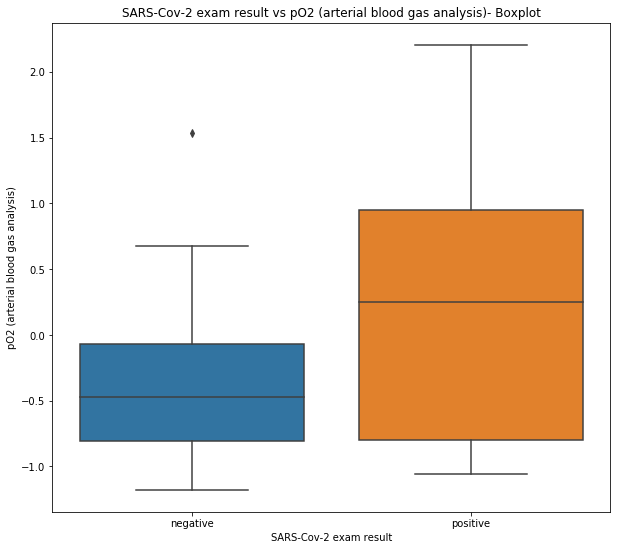

In [240]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="pO2 (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs pO2 (arterial blood gas analysis)- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs Phosphor- Boxplot')

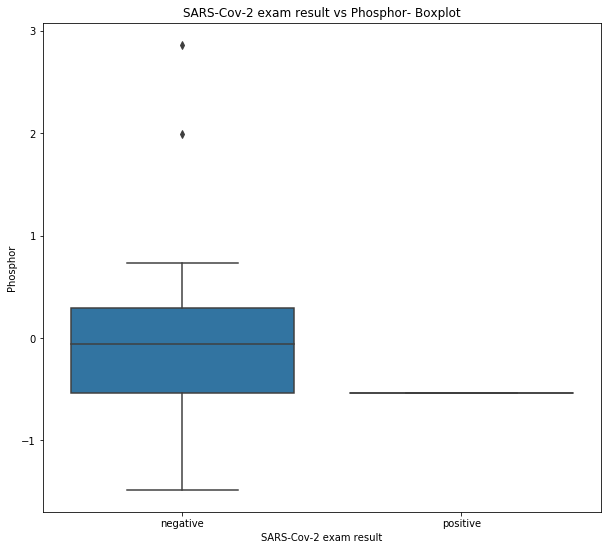

In [241]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="Phosphor",data=df)
plt.title('SARS-Cov-2 exam result vs Phosphor- Boxplot')

Text(0.5, 1.0, 'SARS-Cov-2 exam result vs ctO2 (arterial blood gas analysis)- Boxplot')

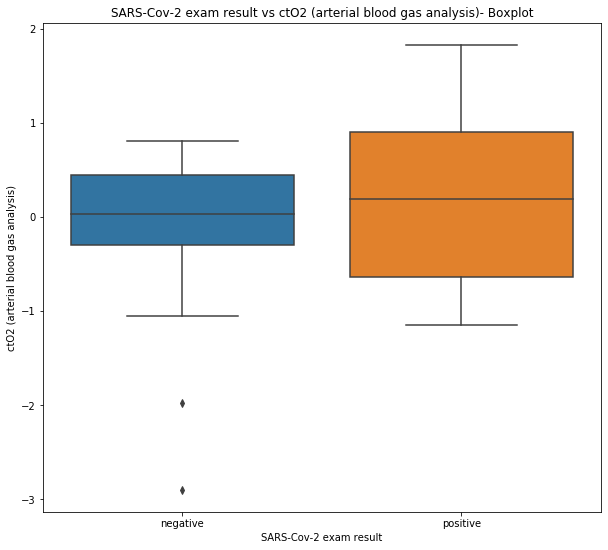

In [242]:
plt.figure(figsize=(10,9))
sns.boxplot(x="SARS-Cov-2 exam result", y="ctO2 (arterial blood gas analysis)",data=df)
plt.title('SARS-Cov-2 exam result vs ctO2 (arterial blood gas analysis)- Boxplot')

In [243]:
df.drop(columns=["Mycoplasma pneumoniae","Fio2 (venous blood gas analysis)","Urine - Nitrite","Urine - Sugar","Partial thromboplastin time (PTT) ","Prothrombin time (PT), Activity","Vitamin B12","Ferritin","Arterial Lactic Acid","Lipase dosage","D-Dimer","Albumin","Hb saturation (arterial blood gases)","pCO2 (arterial blood gas analysis)","HCO3 (arterial blood gas analysis)","pO2 (arterial blood gas analysis)","Arteiral Fio2","Phosphor","ctO2 (arterial blood gas analysis)"],axis=1,inplace=True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 89 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              5644 non-null   int64  
 1   SARS-Cov-2 exam result                            5644 non-null   object 
 2   Hematocrit                                        603 non-null    float64
 3   Hemoglobin                                        603 non-null    float64
 4   Platelets                                         602 non-null    float64
 5   Mean platelet volume                              599 non-null    float64
 6   Red blood Cells                                   602 non-null    float64
 7   Lymphocytes                                       602 non-null    float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 9   Leukocytes         

In [245]:
df_covid = df[["Patient age quantile","SARS-Cov-2 exam result","Hematocrit","Hemoglobin","Platelets","Mean platelet volume ","Red blood Cells","Lymphocytes","Mean corpuscular hemoglobin concentration (MCHC)","Leukocytes","Basophils","Mean corpuscular hemoglobin (MCH)","Eosinophils","Mean corpuscular volume (MCV)","Monocytes","Red blood cell distribution width (RDW)","Influenza A","Influenza B","Rhinovirus/Enterovirus","Coronavirus229E","CoronavirusOC43","Inf A H1N1 2009","Metapneumovirus","Neutrophils","Proteina C reativa mg/dL","Influenza B, rapid test","Influenza A, rapid test","Unit"]]

In [246]:
df_covid.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Rhinovirus/Enterovirus,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Metapneumovirus,Neutrophils,Proteina C reativa mg/dL,"Influenza B, rapid test","Influenza A, rapid test",Unit
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,detected,not_detected,not_detected,not_detected,not_detected,-0.619086,-0.147895,negative,negative,0
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,0


In [247]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              5644 non-null   int64  
 1   SARS-Cov-2 exam result                            5644 non-null   object 
 2   Hematocrit                                        603 non-null    float64
 3   Hemoglobin                                        603 non-null    float64
 4   Platelets                                         602 non-null    float64
 5   Mean platelet volume                              599 non-null    float64
 6   Red blood Cells                                   602 non-null    float64
 7   Lymphocytes                                       602 non-null    float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 9   Leukocytes         

In [248]:
df_covid.isnull().sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Influenza A                                         4290
Influenza B                    

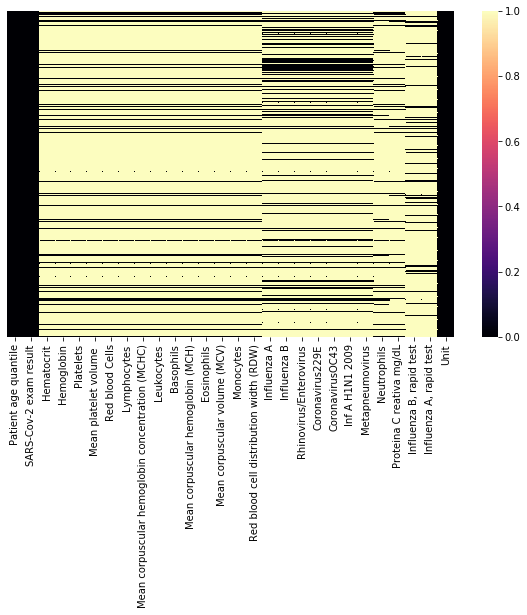

In [249]:
plt.figure(figsize=(10,6))
sns.heatmap(df_covid.isnull(),yticklabels=False,cmap="magma")

In [250]:
df_covid.shape

(5644, 28)

In [251]:
df_covid.dropna(inplace=True)
df_covid.shape

(66, 28)

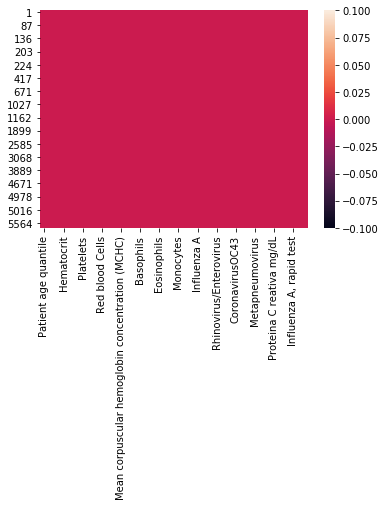

In [253]:
sns.heatmap(df_covid.isnull())

In [254]:
df_covid["SARS-Cov-2 exam result"].value_counts()

negative    56
positive    10
Name: SARS-Cov-2 exam result, dtype: int64

In [255]:
df_covid.skew()

Patient age quantile                               -0.329444
Hematocrit                                          0.090443
Hemoglobin                                          0.034353
Platelets                                           0.737633
Mean platelet volume                                1.198895
Red blood Cells                                    -0.072275
Lymphocytes                                         0.882810
Mean corpuscular hemoglobin concentration (MCHC)   -0.275022
Leukocytes                                          1.091446
Basophils                                           0.377933
Mean corpuscular hemoglobin (MCH)                  -0.547406
Eosinophils                                         3.183594
Mean corpuscular volume (MCV)                       0.239871
Monocytes                                           0.728977
Red blood cell distribution width (RDW)             0.867259
Neutrophils                                        -0.186199
Proteina C reativa mg/dL

In [256]:
newdf= pd.get_dummies(df_covid)
newdf

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,CoronavirusOC43_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_detected,Inf A H1N1 2009_not_detected,Metapneumovirus_detected,Metapneumovirus_not_detected,"Influenza B, rapid test_negative","Influenza B, rapid test_positive","Influenza A, rapid test_negative","Influenza A, rapid test_positive"
1,17,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,...,0,1,0,1,0,1,1,0,1,0
30,9,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,...,0,1,0,1,0,1,1,0,1,0
71,16,0.671398,0.290940,0.135801,0.010677,0.525133,0.173372,-1.249524,-0.653951,0.081693,...,0,1,0,1,0,1,0,1,1,0
84,9,-0.656139,-0.899524,-0.391795,0.796029,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,...,0,1,0,1,1,0,1,0,1,0
87,17,0.442512,0.228284,-0.680717,0.459449,0.736697,-1.165688,-0.652057,-0.589947,-0.529226,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,2,-1.091022,-0.774212,-0.643031,-0.999063,-0.303494,0.164843,1.140354,-0.573250,-0.223767,...,0,1,0,1,0,1,1,0,1,0
5066,19,-0.267033,-0.398276,-0.730964,0.908221,0.278308,-1.182746,-0.552476,-0.080696,-1.140144,...,0,1,0,1,0,1,1,0,1,0
5196,11,-0.450142,0.040316,-0.492289,-0.774677,-0.409276,-1.378914,1.936978,0.038964,-0.529226,...,0,1,0,1,0,1,1,0,1,0
5564,12,1.152058,0.604220,-0.529975,0.010677,0.930631,-0.679533,-1.647838,-0.662300,0.081693,...,0,1,0,1,0,1,1,0,1,0


In [257]:
newdf.columns

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Neutrophils',
       'Proteina C reativa mg/dL', 'Unit', 'SARS-Cov-2 exam result_negative',
       'SARS-Cov-2 exam result_positive', 'Influenza A_not_detected',
       'Influenza B_detected', 'Influenza B_not_detected',
       'Rhinovirus/Enterovirus_detected',
       'Rhinovirus/Enterovirus_not_detected', 'Coronavirus229E_detected',
       'Coronavirus229E_not_detected', 'CoronavirusOC43_detected',
       'CoronavirusOC43_not_detected', 'Inf A H1N1 2009_detected',
       'Inf A H1N1 2009_not_detected', 'Metapneumovirus_detected',
       'Metapneumovirus_not_detected', 'Influenza B, rapid test_negative',


In [258]:
newdf.drop(["SARS-Cov-2 exam result_negative","Influenza A_not_detected","Influenza B_not_detected","Rhinovirus/Enterovirus_not_detected","Coronavirus229E_not_detected","CoronavirusOC43_not_detected","Inf A H1N1 2009_not_detected","Metapneumovirus_not_detected","Influenza B, rapid test_negative","Influenza A, rapid test_negative"],axis=1,inplace=True)

In [259]:
newdf.shape

(66, 27)

In [260]:
X=newdf.drop("SARS-Cov-2 exam result_positive", axis=1)
y=newdf["SARS-Cov-2 exam result_positive"]

In [261]:
from sklearn.preprocessing import StandardScaler
X2=StandardScaler().fit_transform(X)
X2

array([[ 1.21140879,  0.28901611, -0.02165674, ..., -0.12403473,
        -0.25400025, -0.12403473],
       [-0.29713801, -0.8549151 , -0.89513373, ..., -0.12403473,
        -0.25400025, -0.12403473],
       [ 1.02284044,  0.83238276,  0.37537844, ..., -0.12403473,
         3.93700394, -0.12403473],
       ...,
       [ 0.07999869, -0.56893229,  0.0577506 , ..., -0.12403473,
        -0.25400025, -0.12403473],
       [ 0.26856704,  1.43294729,  0.77241359, ..., -0.12403473,
        -0.25400025, -0.12403473],
       [ 0.64570374,  1.37575051,  1.32826338, ..., -0.12403473,
        -0.25400025, -0.12403473]])

In [262]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)
print("Original shape: {}".format(str(X2.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (66, 26)
Reduced shape: (66, 2)


In [263]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 1 is 0.9545454545454546


In [264]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=1)

In [265]:
print(X_train.shape,"\n",X_test.shape)

(44, 26) 
 (22, 26)


In [267]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [268]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
GNB = GaussianNB()
SV = SVC()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
XGB = xgb.XGBClassifier()

In [269]:
models = []
models.append(("LogisticRegression", LR))
models.append(("KNeighborsClassifier", KNN))
models.append(("GaussianNB", GNB))
models.append(("SVC", SV))
models.append(("DecisionTreeClassifier", DTC))
models.append(("RandomForestClassifier", RFC))
models.append(("AdaBoostClassifier", ABC))
models.append(("GradientBoostingClassifier", GBC))
models.append(("XGBoostClassifier", XGB))

In [270]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=1, shuffle=True)

***************** LogisticRegression ******************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score =  0.9545454545454546


Cross val score =  0.8166666666666668


roc_auc_score =  0.75


Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.50      0.67         2

    accuracy                           0.95        22
   macro avg       0.98      0.75      0.82        22
weighted avg       0.96      0.95      0.95        22



Confusion Matrix 
[[20  0]
 [ 1  1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** KNeighborsClassifier ******************

KNeighborsClassi

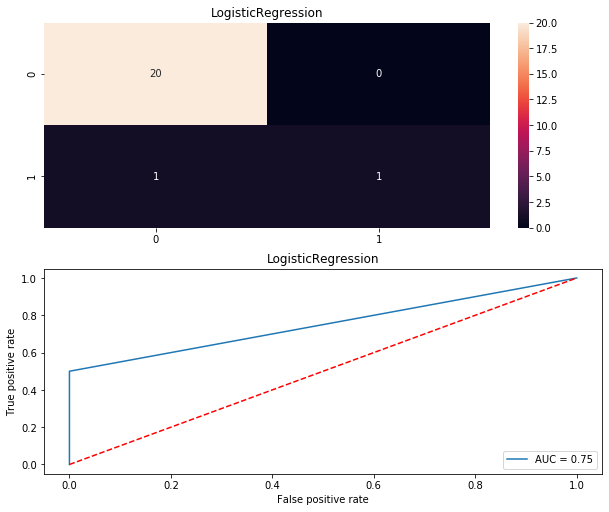

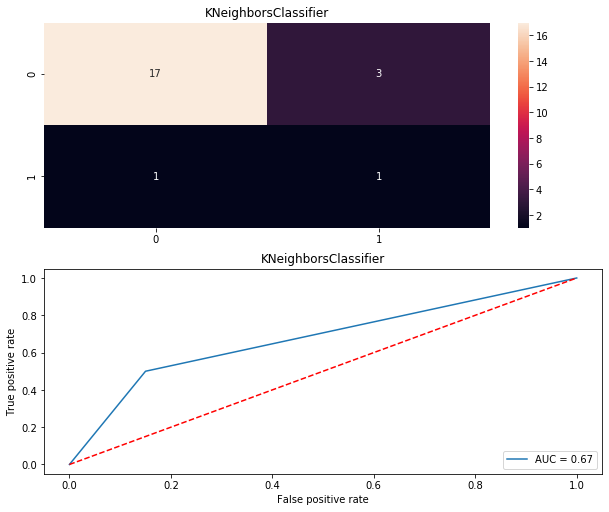

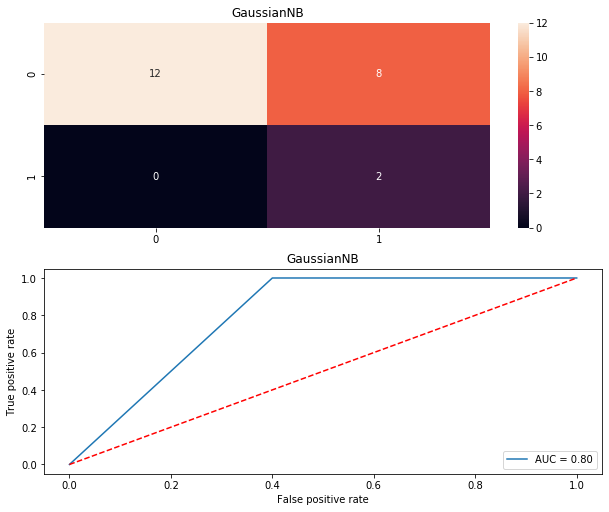

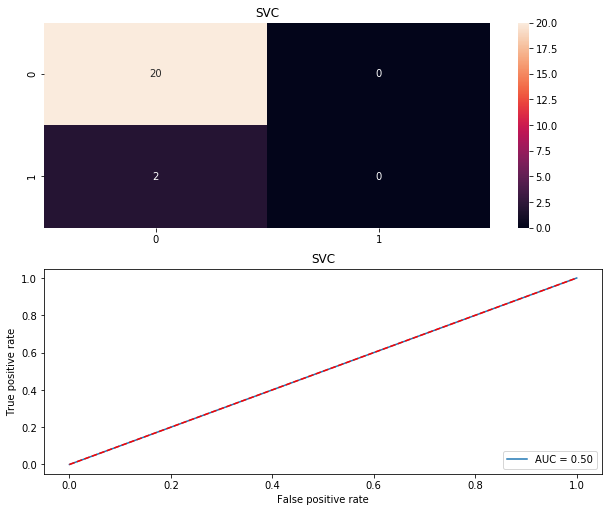

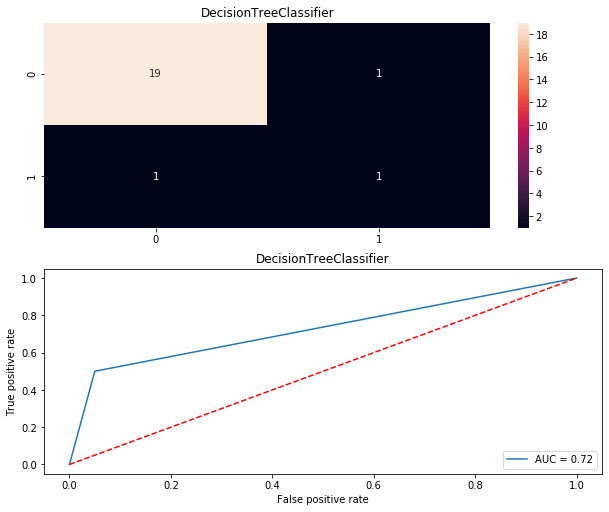

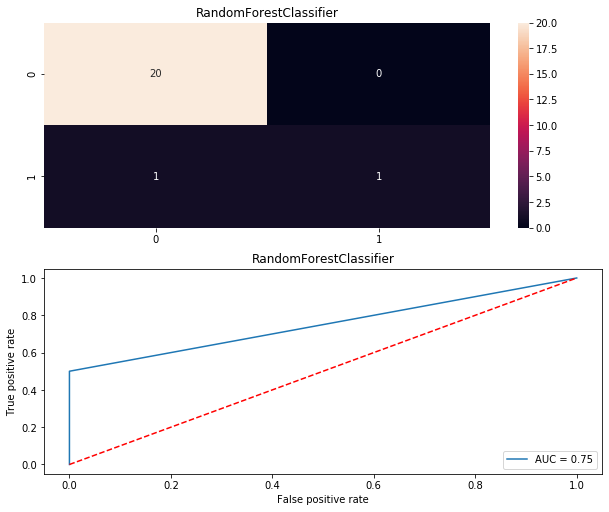

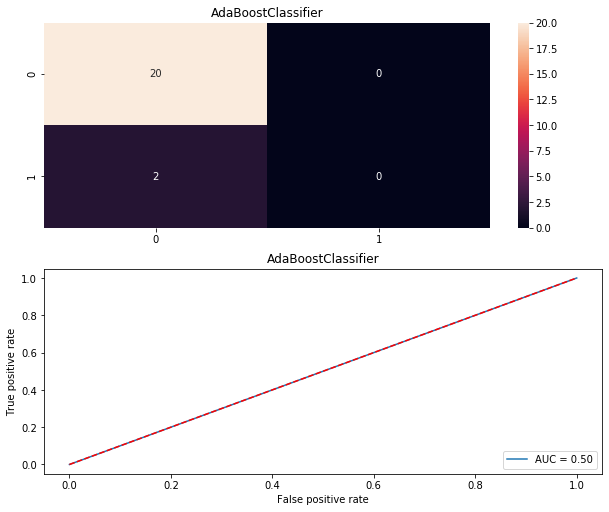

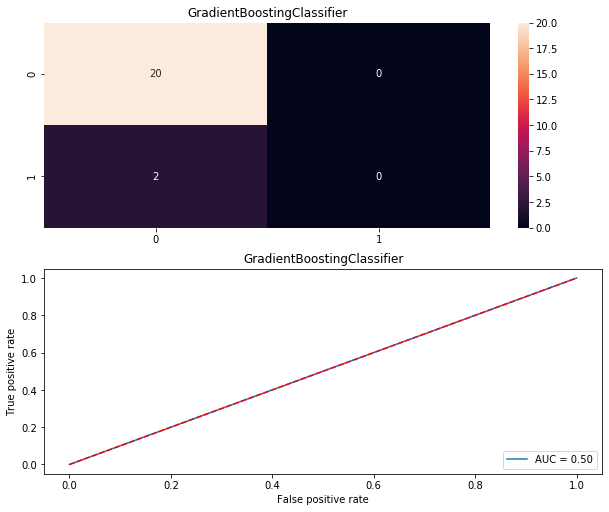

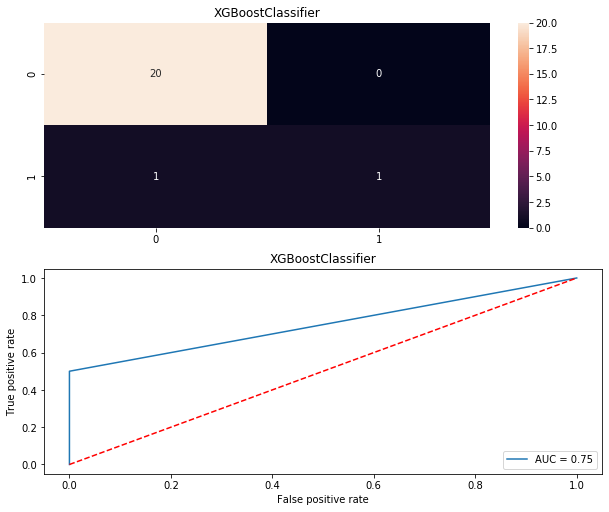

In [271]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    AS = accuracy_score(y_test,pre)
    print("Accuracy Score = ",AS)
    score.append(AS*100)
    print("\n")
    sc = cross_val_score(model,X,y,cv=10,scoring="accuracy").mean()
    print("Cross val score = ",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("Classification Report\n", classification_report(y_test,pre))
    print("\n")
    cm = confusion_matrix(y_test,pre)
    print("Confusion Matrix \n{}".format(cm))
    print("\n")
    plt.figure(figsize = (10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [272]:
result=pd.DataFrame({"Model": Model, "Accuracy Socre": score, "Cross val score": cvs, 'ROC AUC Curve': rocscore})
result

,Model,Accuracy Socre,Cross val score,ROC AUC Curve
0,LogisticRegression,95.454545,81.666667,75.0
1,KNeighborsClassifier,81.818182,85.714286,67.5
2,GaussianNB,63.636364,60.476190,80.0
3,SVC,90.909091,84.761905,50.0
4,DecisionTreeClassifier,90.909091,75.952381,72.5
5,RandomForestClassifier,95.454545,84.761905,75.0
6,AdaBoostClassifier,90.909091,83.095238,50.0
7,GradientBoostingClassifier,90.909091,80.000000,50.0
8,XGBoostClassifier,95.454545,87.619048,75.0


In [273]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [6,7,8]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
    

In [274]:
XGB=xgb.XGBRegressor(n_estimators=7)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=7, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [275]:
from sklearn.externals import joblib
joblib.dump(XGB,'Covid19_Brazil.pkl')

['Covid19_Brazil.pkl']